# **RA1: data**

Dong Gyun Ko <br/>
last updated: october 11, 2022 <br/>

In [85]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
import datetime as dt
import os
import warnings
import requests # python 3.6

import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas_datareader import wb
from pandas_datareader.data import DataReader

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [86]:
# set the working directory

os.chdir('/content/gdrive/MyDrive/Colab Notebooks/RA1_data')

## **1. data**

### **1.1. python code** <br/>

In [87]:
# import the data

data = pd.read_excel('data.xlsx').drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [88]:
# import the panel 2 data

df_q_panel_2 = pd.read_excel('df_q_panel_2.xlsx').drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [89]:
# rename the columns

df_q_panel_2 = df_q_panel_2.rename(columns={'country':'country', 'isocode':'isocode', 'quarter':'quarter', 
                                            'imf_q_ngdp':'ngdp', 'imf_q_exp':'exp', 'imf_q_imp':'imp', 'imf_q_tradeopen':'tradeopen', 
                                            'ci_a_kaopen':'finopen_ci', 'ci_a_kaopen_n':'finopen_ci_n', 
                                            'ewn_a_extasset':'extasset', 'ewn_a_extliab':'extliab', 'ewn_a_gdp':'gdp', 'ewn_a_finopen_fa':'finopen_fa', 
                                            'irr_a_fx_fine':'fxflex_fine', 'irr_a_fx_coarse':'fxflex_coarse', 
                                            'imf_q_pcon':'pcon', 'wb_a_cds_5y':'cds'})

df_q_panel_2 = df_q_panel_2[['country', 'isocode', 'quarter', 'tradeopen', 'finopen_ci', 'finopen_ci_n', 'finopen_fa', 'fxflex_fine', 'fxflex_coarse', 'pcon', 'cds']]

In [90]:
# seasonal adjustment

# classical decomposition

def cd(df):

    seasonal = sm.tsa.seasonal_decompose(df, model='additive', period=4).seasonal

    return df - seasonal

# STL decomposition

def stld(df):

    stl = STL(df, period=4, seasonal=5)
    res = stl.fit()
    seasonal = res.seasonal

    return df - seasonal

# tradeopen
for i in range(0, df_q_panel_2['isocode'].unique().shape[0]):
  
    globals()['cond_isocode{}'.format(i+1)] = (df_q_panel_2['isocode'] == df_q_panel_2['isocode'].unique()[i])
    globals()['df_q_panel_2_isocode{}'.format(i+1)] = df_q_panel_2.loc[globals()['cond_isocode{}'.format(i+1)]]

    globals()['cond_null{}'.format(i+1)] = (globals()['df_q_panel_2_isocode{}'.format(i+1)]['tradeopen'].isnull() == True)

    globals()['df_q_panel_2_sa{}'.format(i+1)] = globals()['df_q_panel_2_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]

    df_q_panel_2.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'tradeopen'] = stld(globals()['df_q_panel_2_sa{}'.format(i+1)]['tradeopen'])

# finopen_fa
for i in range(0, df_q_panel_2['isocode'].unique().shape[0]):
  
    globals()['cond_isocode{}'.format(i+1)] = (df_q_panel_2['isocode'] == df_q_panel_2['isocode'].unique()[i])
    globals()['df_q_panel_2_isocode{}'.format(i+1)] = df_q_panel_2.loc[globals()['cond_isocode{}'.format(i+1)]]

    globals()['cond_null{}'.format(i+1)] = (globals()['df_q_panel_2_isocode{}'.format(i+1)]['finopen_fa'].isnull() == True)

    globals()['df_q_panel_2_sa{}'.format(i+1)] = globals()['df_q_panel_2_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]

    df_q_panel_2.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'finopen_fa'] = stld(globals()['df_q_panel_2_sa{}'.format(i+1)]['finopen_fa'])

# pcon
for i in range(0, df_q_panel_2['isocode'].unique().shape[0]):
  
    globals()['cond_isocode{}'.format(i+1)] = (df_q_panel_2['isocode'] == df_q_panel_2['isocode'].unique()[i])
    globals()['df_q_panel_2_isocode{}'.format(i+1)] = df_q_panel_2.loc[globals()['cond_isocode{}'.format(i+1)]]

    globals()['cond_null{}'.format(i+1)] = (globals()['df_q_panel_2_isocode{}'.format(i+1)]['pcon'].isnull() == True)

    globals()['df_q_panel_2_sa{}'.format(i+1)] = globals()['df_q_panel_2_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]

    df_q_panel_2.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'pcon'] = stld(globals()['df_q_panel_2_sa{}'.format(i+1)]['pcon'])

In [91]:
# quarterly panel 2 dataset

df_q_panel_2 = df_q_panel_2.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

df_q_panel_2

,country,isocode,quarter,tradeopen,finopen_ci,finopen_ci_n,finopen_fa,fxflex_fine,fxflex_coarse,pcon,cds
0,Argentina,ARG,1950Q1,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN
1,Argentina,ARG,1950Q2,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN
2,Argentina,ARG,1950Q3,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN
3,Argentina,ARG,1950Q4,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN
4,Argentina,ARG,1951Q1,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,55.22,NaN,NaN,245.38,NaN,NaN,769625497221.63,211.64
14496,South Africa,ZAF,2021Q3,57.41,NaN,NaN,226.94,NaN,NaN,742694325320.05,211.64
14497,South Africa,ZAF,2021Q4,59.45,NaN,NaN,204.00,NaN,NaN,746925974429.68,211.64
14498,South Africa,ZAF,2022Q1,61.19,NaN,NaN,NaN,NaN,NaN,755775447564.89,NaN


In [92]:
# merge the quarterly data with the quarterly panel 2 data

data = pd.merge(data, df_q_panel_2, how='outer', on=['country', 'isocode', 'quarter'])

In [93]:
# quarterly dataset

data = data[['country', 'isocode', 'quarter', 'region', 'income', 'oecd', 'g7', 'tradeopen', 'finopen_ci', 'finopen_ci_n', 'finopen_fa', 'fxflex_fine', 'fxflex_coarse', 'ggdebt', 'ggcon', 'gdp', 'reer', 'ca', 'pcon', 'cds']]
data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

data

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,finopen_fa,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.22,NaN,NaN,245.38,NaN,NaN,70.88,223698443352.74,1165743462187.47,80.20,5.04,769625497221.63,211.64
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.41,NaN,NaN,226.94,NaN,NaN,70.73,223959202009.14,1124134900926.21,78.67,2.39,742694325320.05,211.64
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.45,NaN,NaN,204.00,NaN,NaN,71.31,224091595830.67,1125566644987.62,75.72,3.02,746925974429.68,211.64
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.19,NaN,NaN,NaN,NaN,NaN,NaN,225833007897.79,1137366344106.18,76.99,2.61,755775447564.89,NaN


### **1.2. var. summary** <br/>

| |variable|abbreviation|unit|frequency|measure|source|
|-|--------|------------|----|---------|-------|------|
|1|region indicator|region|-|-|EAS: 1, SAS: 2, ECS: 3, MEA: 4, SSF: 5, NAC: 6, LCN: 7|WB|
|2|income indicator|income|-|-|HIC: 1, UMC: 2, LMC: 3, LIC: 4|WB|
|3|oecd indicator|oecd|-|-|OED: 1|WB|
|4|g7 indicator|g7|-|-|G7: 1|WB|
|5|trade openness, (export + import) / GDP|tradeopen|% of GDP|quarterly|SA by STL|IMF|
|6|financial openness, Chinn-Ito index|finopen_ci|-|annual|-|CI|
|7|financial openness, Chinn-Ito index, normalized|finopen_ci_n|-|annual|normalzied (0-1)|CI|
|8|financial openness, (ext. assets + ext. liabilities) / GDP|finopen_fa|% of GDP|annual|SA by STL|EWN|
|9|FX system flexibility, exchange regime classfication, fine|fxflex_fine|-|annual|fine|IRR|
|10|FX system flexibility, exchange regime classfication, coarse|fxflex_coarse|-|annual|coarse|IRR|
|11|general government debt|ggdebt|% of GDP|quarterly|SA by STL|BIS, WB, Eurostat|
|12|general government consumption, real|ggcon|DCU|quarterly|real / SA by STL|IMF, FRED|
|13|gross domestic product, real|gdp|DCU|quarterly|real / SA by STL|IMF|
|14|real effective exchange rate|reer|index|quarterly|real|BIS, IMF|
|15|current account balance|ca|% of GDP|quarterly|SA by STL|OECD, IMF, FRED|
|16|private consumption, real|pcon|DCU|quarterly|real / SA by STL|IMF|
|17|5-year sovereign CDS spread|cds|basis point|annual|-|WB|

### **1.3. data summary** <br/>

In [94]:
# number of countries & sample period

print('number of countries:', data['isocode'].unique().shape[0])
print(data['isocode'].unique())
print('start:', np.min(data['quarter'].unique()))
print('end:', np.max(data['quarter'].unique()))

number of countries: 50
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CYP' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HRV' 'HUN' 'IDN'
 'IND' 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MLT' 'NLD'
 'NOR' 'NZL' 'POL' 'PRT' 'ROU' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'THA' 'TUR'
 'USA' 'ZAF']
start: 1950Q1
end: 2022Q2


In [95]:
# non-null count by each variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        14500 non-null  object 
 1   isocode        14500 non-null  object 
 2   quarter        14500 non-null  object 
 3   region         14500 non-null  int64  
 4   income         14500 non-null  int64  
 5   oecd           10440 non-null  float64
 6   g7             2030 non-null   float64
 7   tradeopen      6191 non-null   float64
 8   finopen_ci     8600 non-null   float64
 9   finopen_ci_n   8600 non-null   float64
 10  finopen_fa     9292 non-null   float64
 11  fxflex_fine    13400 non-null  float64
 12  fxflex_coarse  13400 non-null  float64
 13  ggdebt         5587 non-null   float64
 14  ggcon          6442 non-null   float64
 15  gdp            6389 non-null   float64
 16  reer           7591 non-null   float64
 17  ca             6086 non-null   float64
 18  pcon  

In [96]:
# descriptive statistics

pd.options.display.float_format = '{:.2f}'.format
round(data[['ggdebt', 'ggcon', 'gdp', 'reer', 'ca', 'pcon', 'cds']].describe(), 2)

,ggdebt,ggcon,gdp,reer,ca,pcon,cds
count,5587.00,6442.00,6389.00,7591.00,6086.00,6131.00,3204.00
mean,55.96,4532532484647.42,38866750643511.47,97.43,-0.08,23000562720867.86,318.80
std,34.45,21624065103603.47,234588086412315.84,19.10,5.51,133911320765830.58,2102.32
min,3.68,29940.86,1309589293.37,32.42,-47.76,815770839.92,1.77
25%,31.79,10819697477.85,55490076984.74,89.78,-3.13,29285201853.65,34.60
50%,48.33,53732045822.35,267664960565.15,97.94,-0.72,153703649530.01,81.62
75%,71.94,194813015692.21,768761357303.61,103.85,2.44,476742224468.75,189.79
max,227.18,251067293692856.69,2896892682330298.00,281.92,32.61,1559219424873803.00,50990.61


## **2. count the data**

### **2.1. pcon**

In [97]:
# generate the count matrix for each country's quarterly data (pcon)

for i in range(0, data['isocode'].unique().shape[0]):
  
    globals()['cond_isocode_{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['df_isocode_{}'.format(i+1)] = data.loc[globals()['cond_isocode_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_{}'.format(i+1)].groupby(globals()['df_isocode_{}'.format(i+1)]['quarter']).count()

    globals()['cond_pcon_{}'.format(i+1)] = (globals()['df_isocode_count_T_{}'.format(i+1)]['pcon'] == 0)
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].loc[~globals()['cond_pcon_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].reset_index()

    print('country', data['country'].unique()[i])
    print('isocode', data['isocode'].unique()[i])
    print('start:', globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().min())
    print('end:', globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().max())
    print('obs.:', globals()['df_isocode_count_T_{}'.format(i+1)]['pcon'].count())
    print('des. stat.', globals()['df_isocode_{}'.format(i+1)]['pcon'].describe())
    print('')

country Argentina
isocode ARG
start: 2004Q1
end: 2022Q2
obs.: 74
des. stat. count             74.00
mean    115116532010.27
std      16965413733.73
min      75994731834.28
25%     104799200815.84
50%     121797166192.90
75%     128612809847.99
max     138580481579.11
Name: pcon, dtype: float64

country Australia
isocode AUS
start: 1959Q3
end: 2022Q2
obs.: 252
des. stat. count            252.00
mean    131513245532.67
std      74920755764.87
min      33920849243.57
25%      70877371342.15
50%     109857888163.80
75%     195366330197.24
max     278948785264.22
Name: pcon, dtype: float64

country Austria
isocode AUT
start: 1995Q1
end: 2022Q2
obs.: 110
des. stat. count           110.00
mean    37773656973.27
std      3661881537.67
min     30198755849.78
25%     34786530122.59
50%     38736218742.37
75%     40494247601.97
max     43707524965.75
Name: pcon, dtype: float64

country Belgium
isocode BEL
start: 1995Q1
end: 2022Q2
obs.: 110
des. stat. count           110.00
mean    45191662718.88

### **2.2. cds**

In [98]:
# generate the count matrix for each country's quarterly data (cds)

for i in range(0, data['isocode'].unique().shape[0]):
  
    globals()['cond_isocode_{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['df_isocode_{}'.format(i+1)] = data.loc[globals()['cond_isocode_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_{}'.format(i+1)].groupby(globals()['df_isocode_{}'.format(i+1)]['quarter']).count()

    globals()['cond_cds_{}'.format(i+1)] = (globals()['df_isocode_count_T_{}'.format(i+1)]['cds'] == 0)
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].loc[~globals()['cond_cds_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].reset_index()

    print('country', data['country'].unique()[i])
    print('isocode', data['isocode'].unique()[i])

    if globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().shape[0] == 0:

       continue

    else:

       print('start:', globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().min())
       print('end:', globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().max())
       print('obs.:', globals()['df_isocode_count_T_{}'.format(i+1)]['cds'].count())
       print('des. stat.', globals()['df_isocode_{}'.format(i+1)]['cds'].describe())
       print('')

country Argentina
isocode ARG
start: 1997Q1
end: 2021Q4
obs.: 88
des. stat. count      88.00
mean     3250.72
std      5295.64
min       263.58
25%       482.52
50%      1053.44
75%      2851.83
max     21978.63
Name: cds, dtype: float64

country Australia
isocode AUS
start: 2001Q1
end: 2021Q4
obs.: 84
des. stat. count   84.00
mean    26.47
std     22.55
min      2.00
25%      4.00
50%     19.79
75%     38.44
max     71.83
Name: cds, dtype: float64

country Austria
isocode AUT
start: 2005Q1
end: 2019Q4
obs.: 60
des. stat. count    60.00
mean     41.56
std      40.72
min       2.14
25%       4.18
50%      28.36
75%      79.46
max     119.23
Name: cds, dtype: float64

country Belgium
isocode BEL
start: 2003Q1
end: 2019Q4
obs.: 68
des. stat. count    68.00
mean     50.37
std      61.23
min       2.54
25%       5.53
50%      33.51
75%      63.23
max     208.62
Name: cds, dtype: float64

country Bulgaria
isocode BGR
start: 1998Q1
end: 2021Q4
obs.: 96
des. stat. count    96.00
mean    221.62

## **3. plot the data**

In [99]:
# generate the data temp

df_q_panel_2= pd.read_excel('df_q_panel_2.xlsx')

data_temp = df_q_panel_2[['country', 'isocode', 'quarter', 
                          'imf_q_ngdp', 'imf_q_exp', 'imf_q_imp', 'imf_q_tradeopen', 
                          'ci_a_kaopen', 'ci_a_kaopen_n', 
                          'ewn_a_extasset', 'ewn_a_extliab', 'ewn_a_gdp', 'ewn_a_finopen_fa', 
                          'irr_a_fx_fine', 'irr_a_fx_coarse', 
                          'imf_q_pcon', 'wb_a_cds_5y']]
data_temp = data_temp.rename(columns={'country':'country', 'isocode':'isocode', 'quarter':'quarter', 
                                      'imf_q_ngdp':'ngdp', 'imf_q_exp':'exp', 'imf_q_imp':'imp', 'imf_q_tradeopen':'tradeopen', 
                                      'ci_a_kaopen':'finopen_ci', 'ci_a_kaopen_n':'finopen_ci_n', 
                                      'ewn_a_extasset':'extasset', 'ewn_a_extliab':'extliab', 'ewn_a_gdp':'gdp', 'ewn_a_finopen_fa':'finopen_fa', 
                                      'irr_a_fx_fine':'fxflex_fine', 'irr_a_fx_coarse':'fxflex_coarse', 
                                      'imf_q_pcon':'pcon', 'wb_a_cds_5y':'cds'})


data_temp = data_temp.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

### **3.1. pcon** <br/>

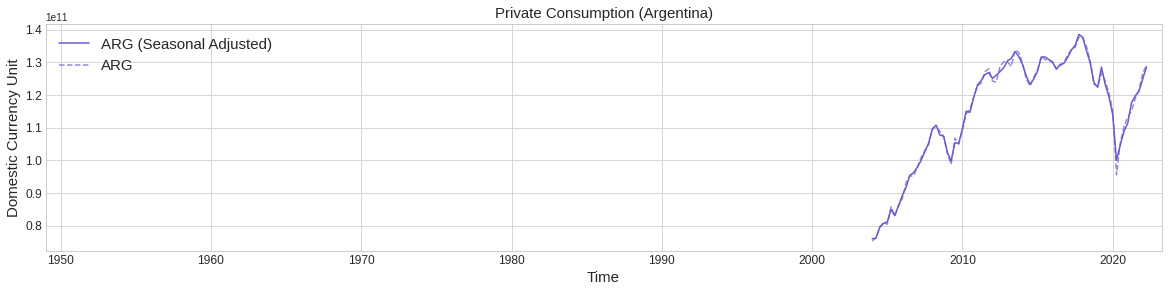

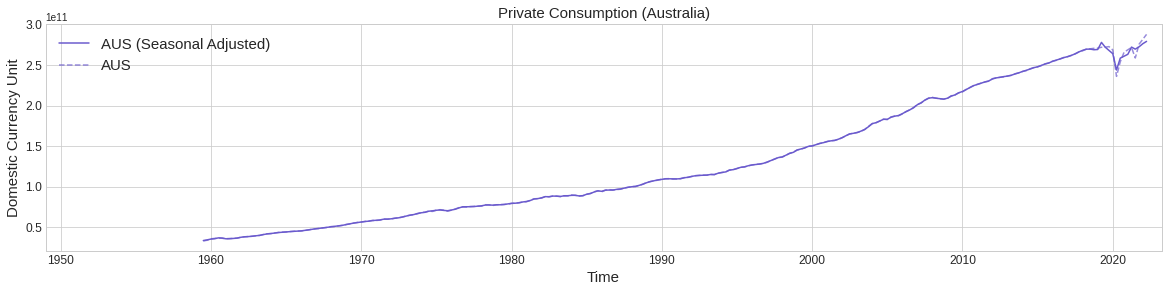

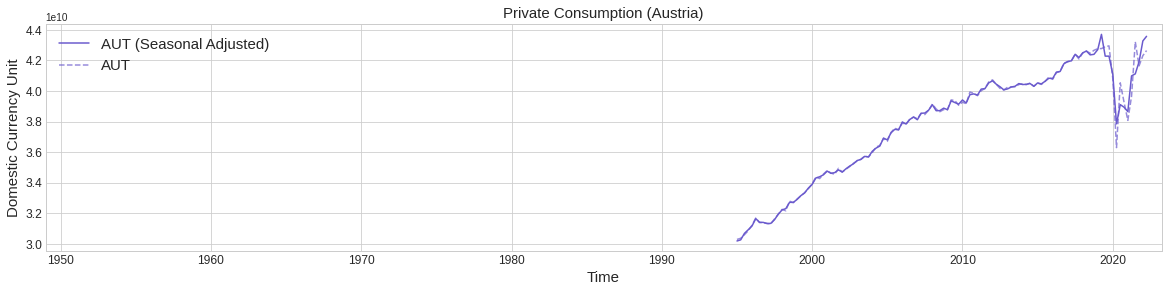

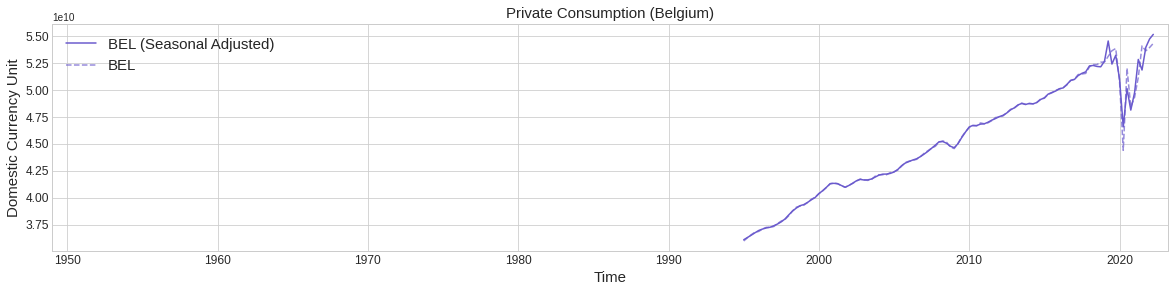

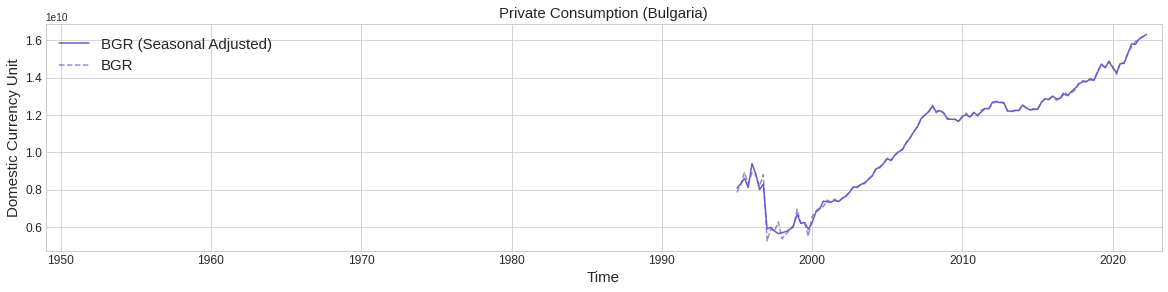

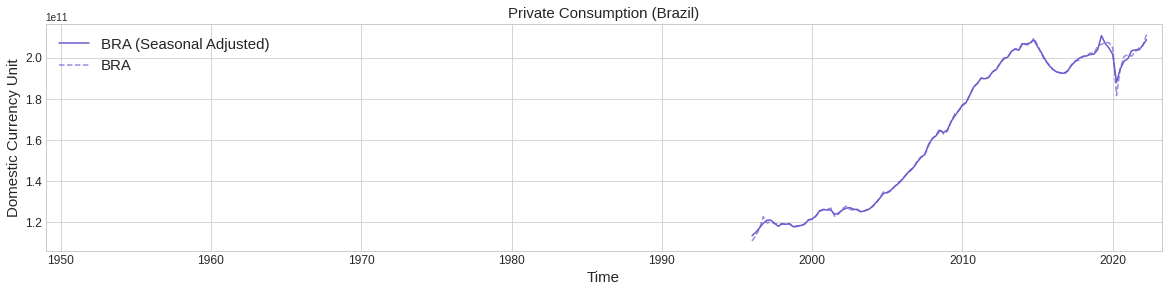

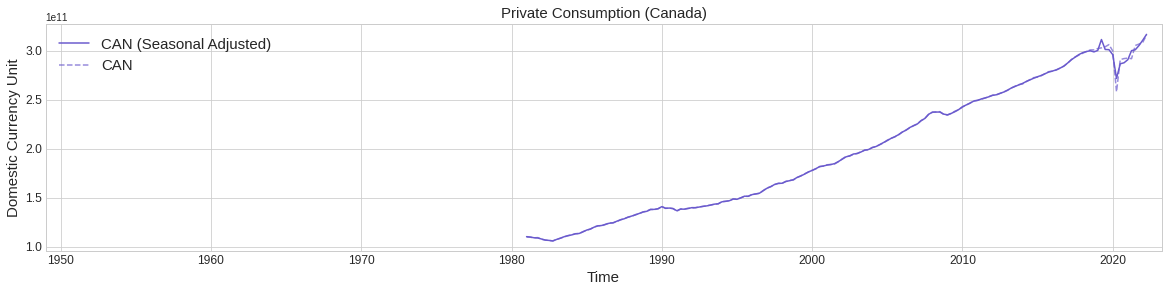

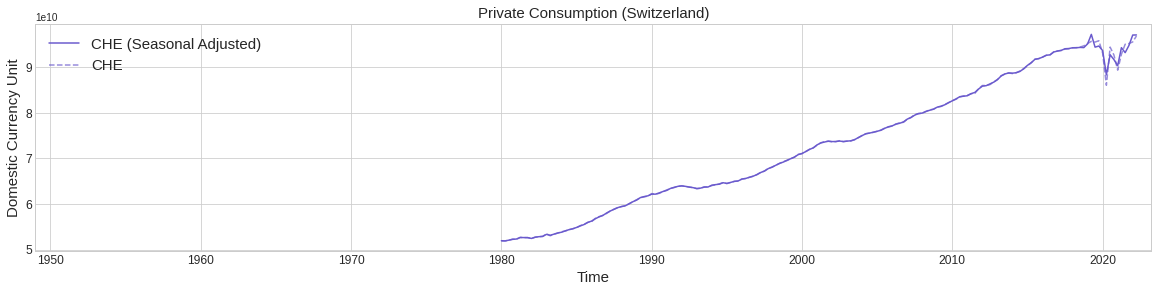

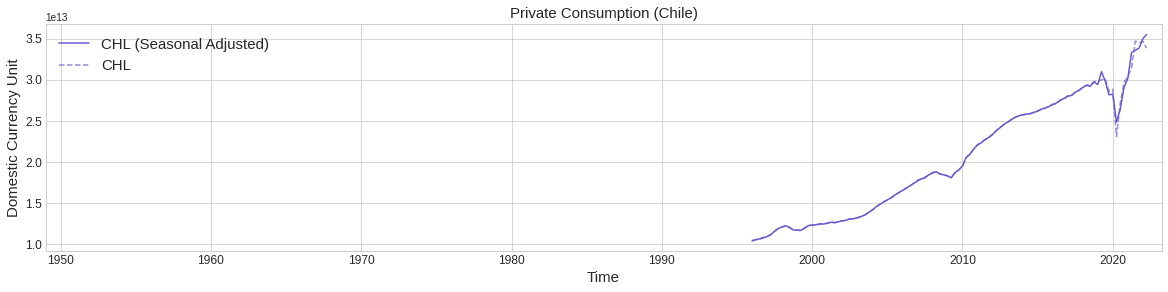

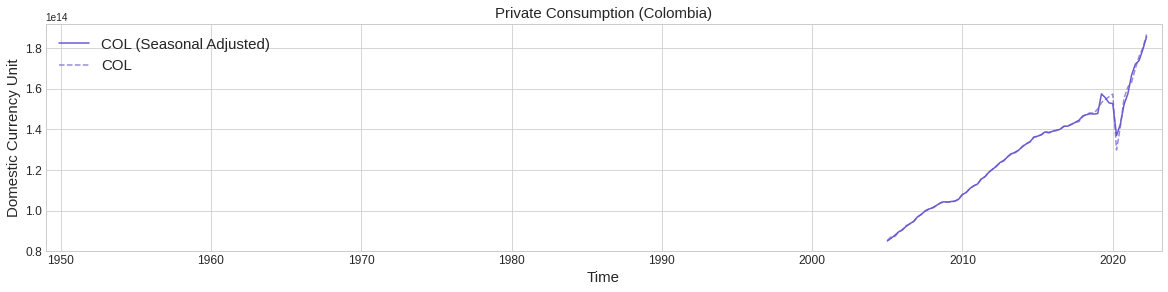

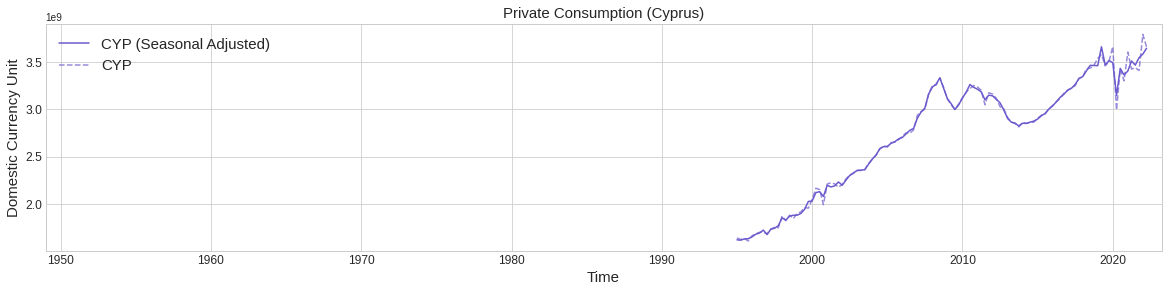

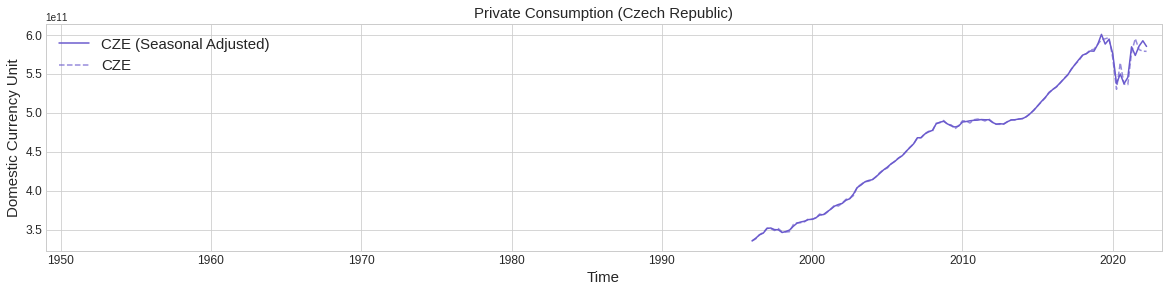

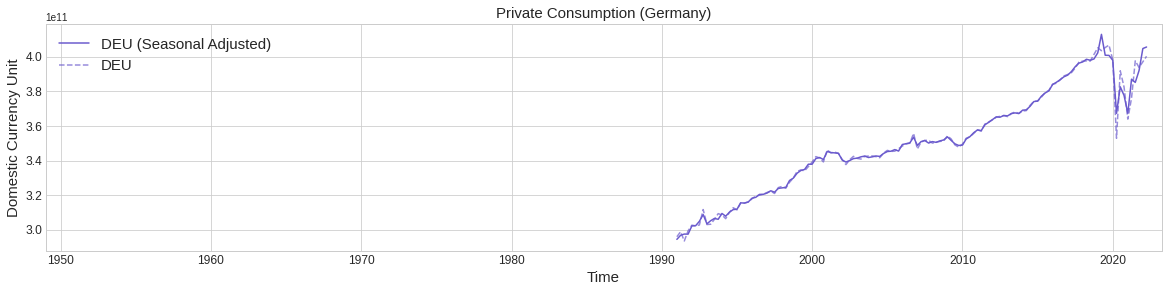

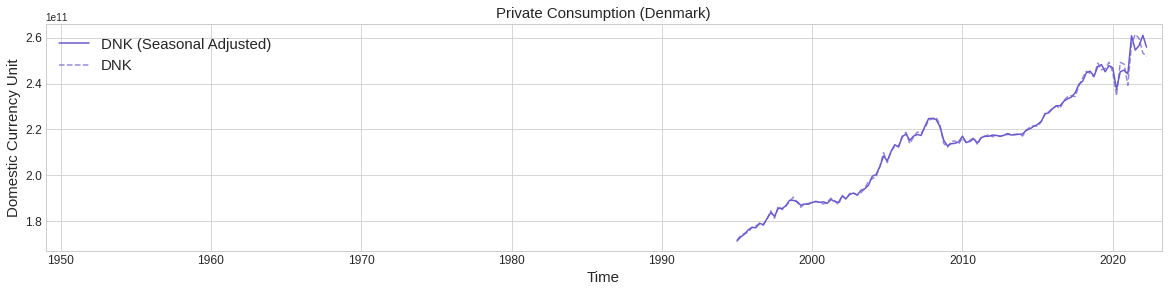

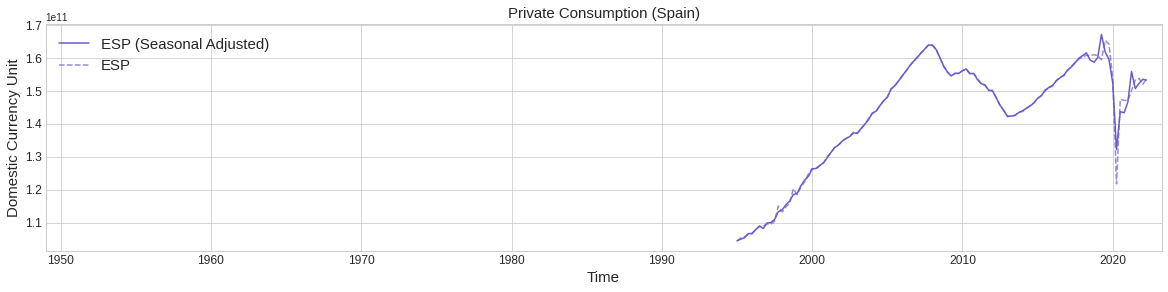

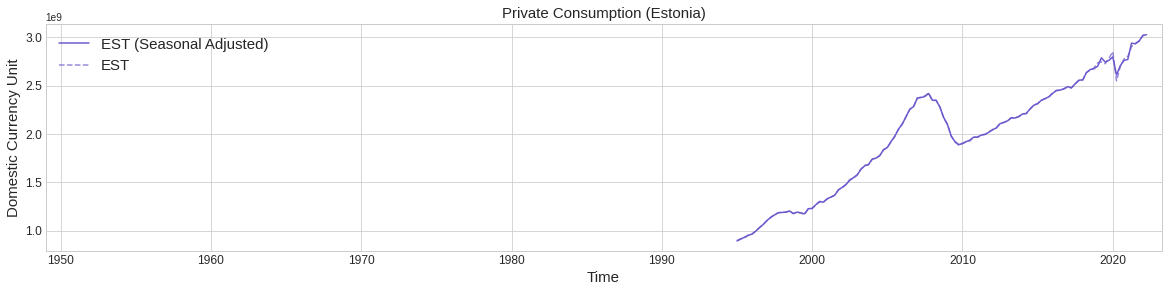

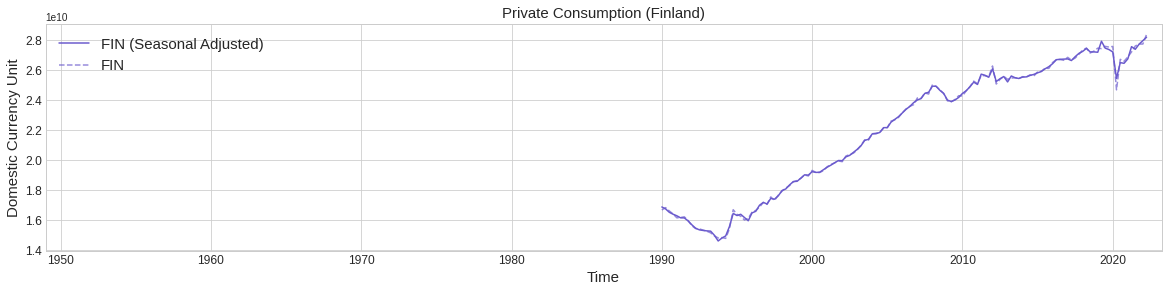

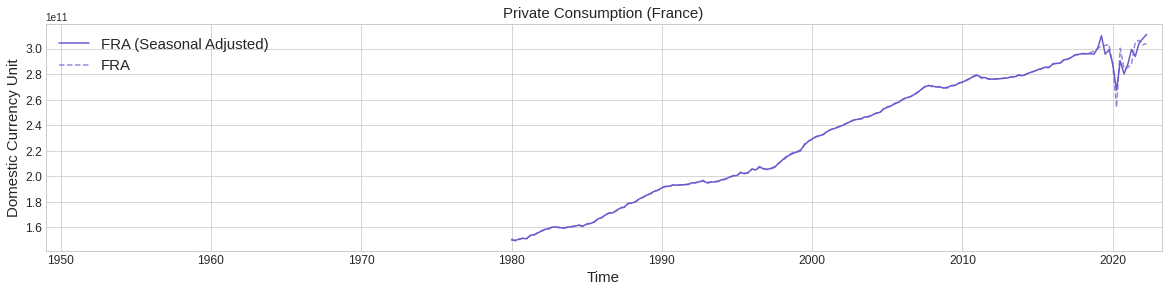

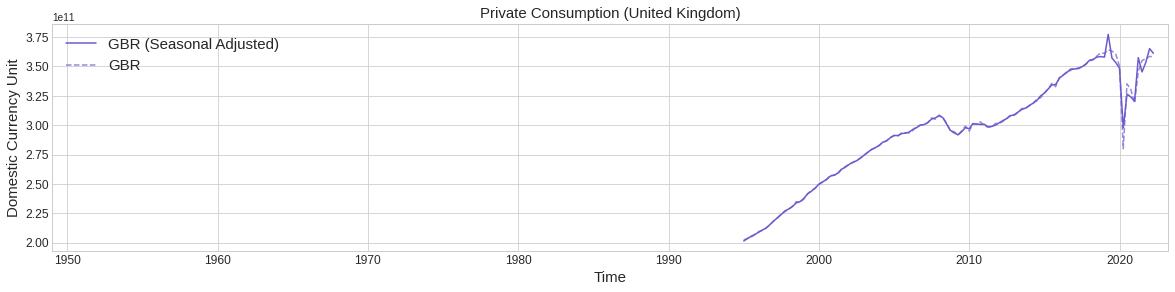

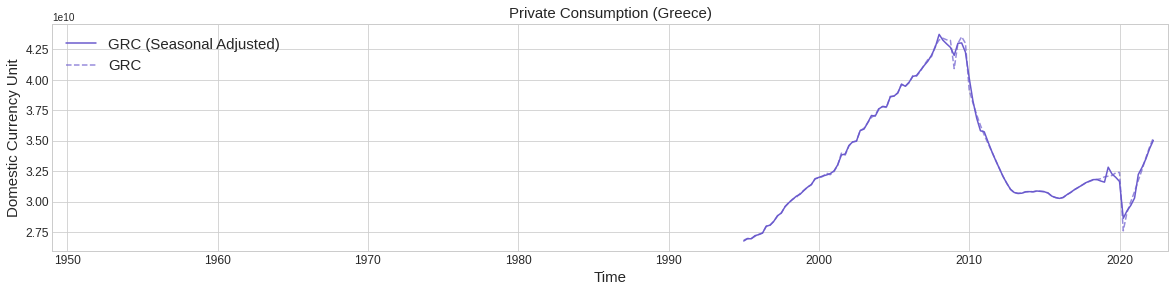

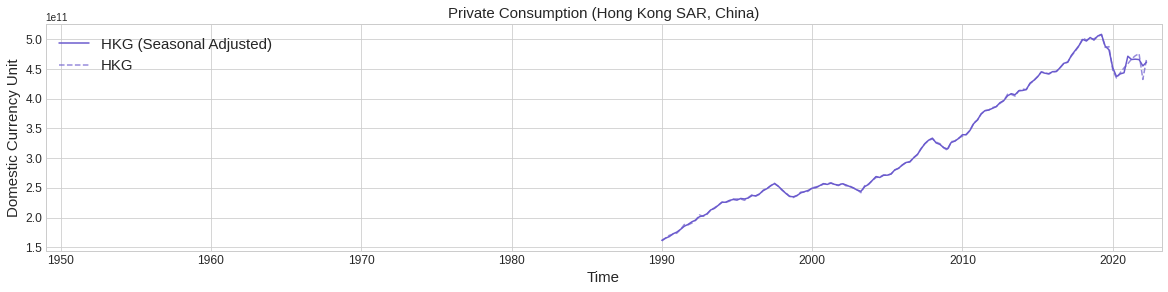

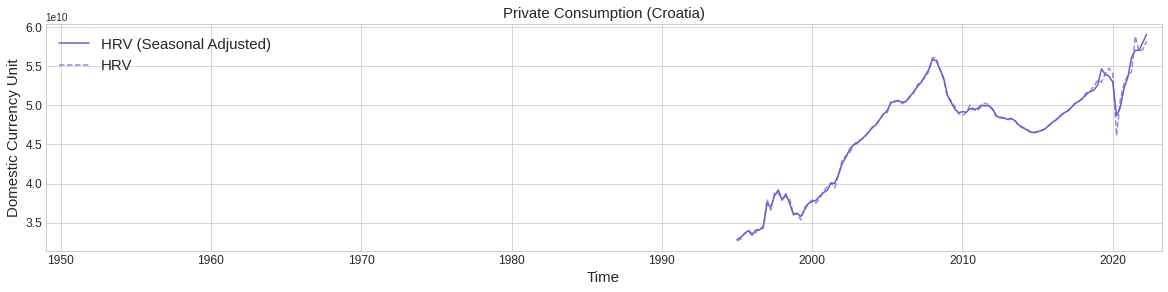

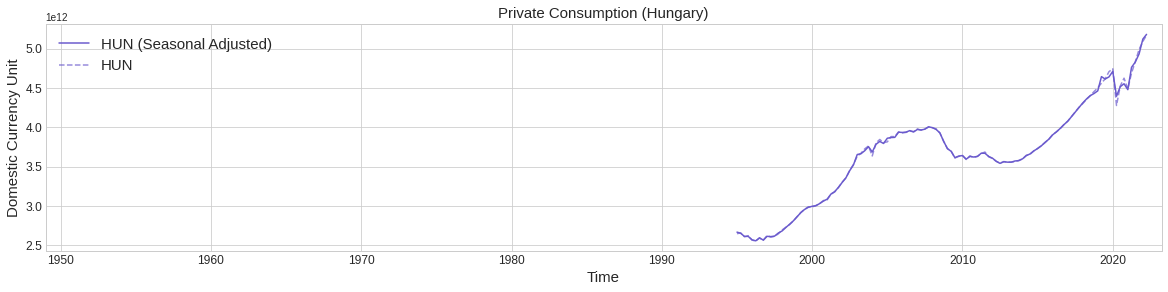

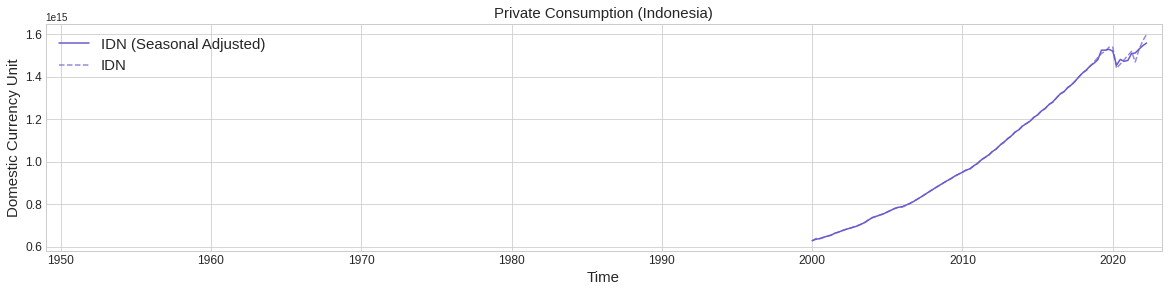

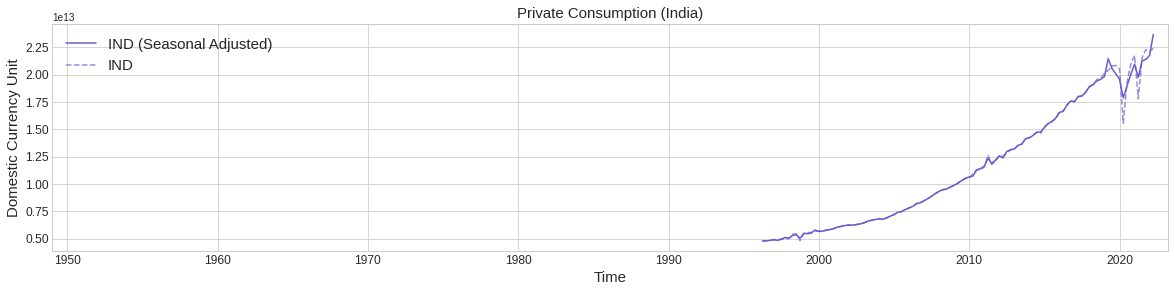

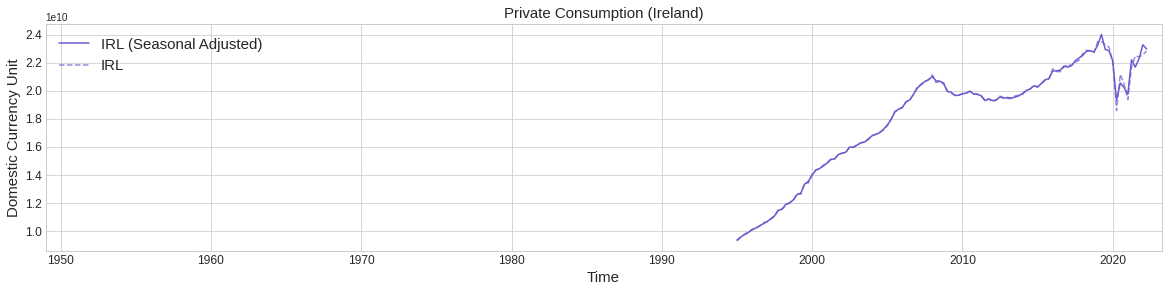

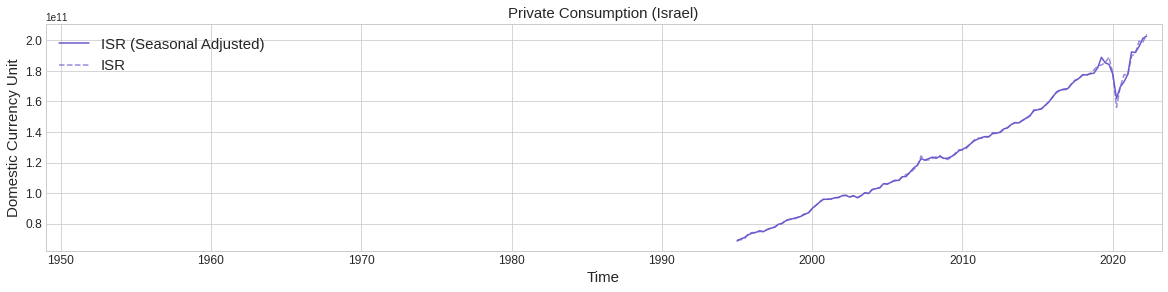

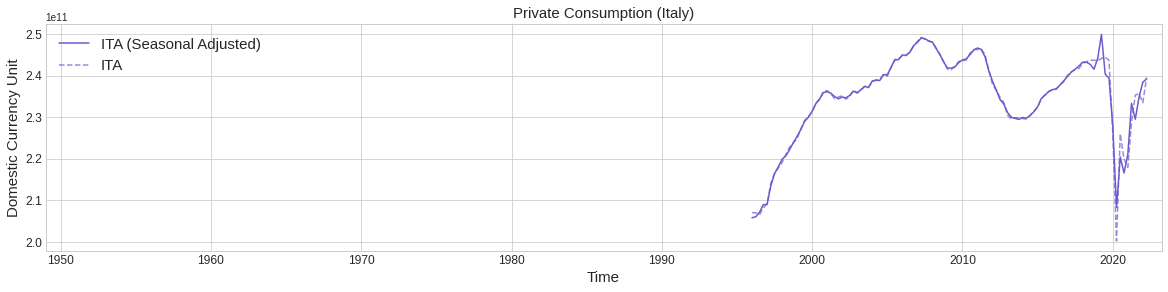

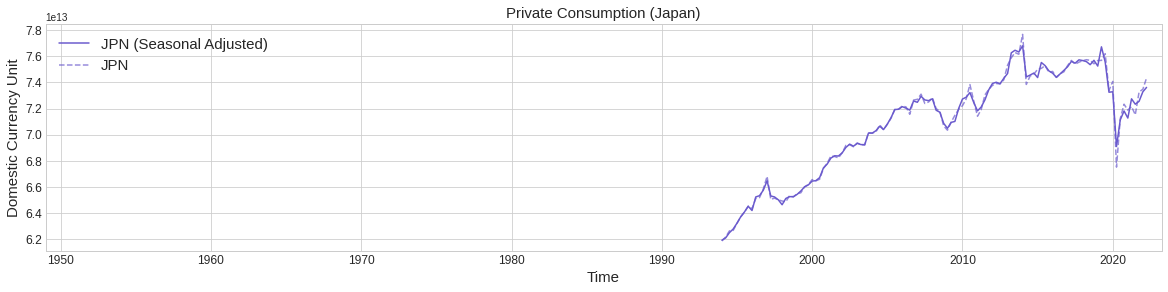

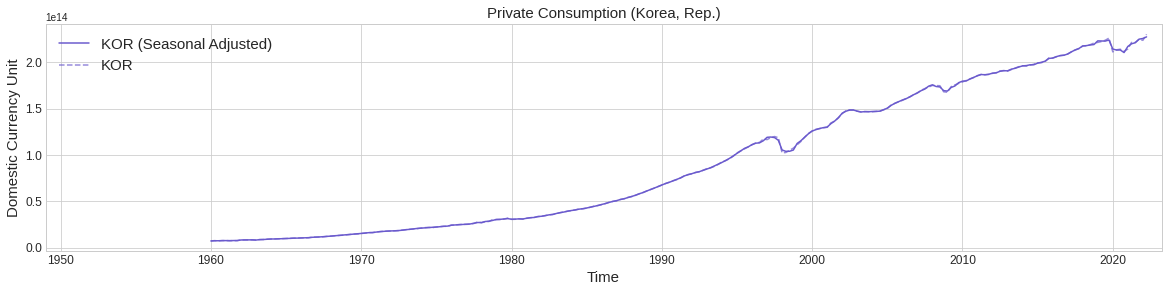

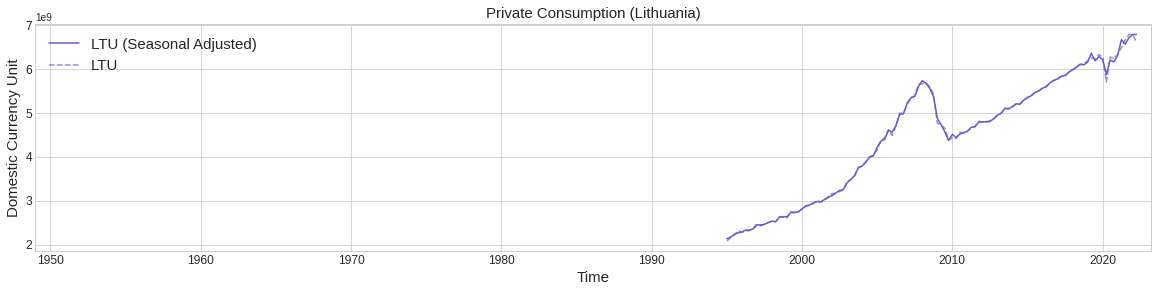

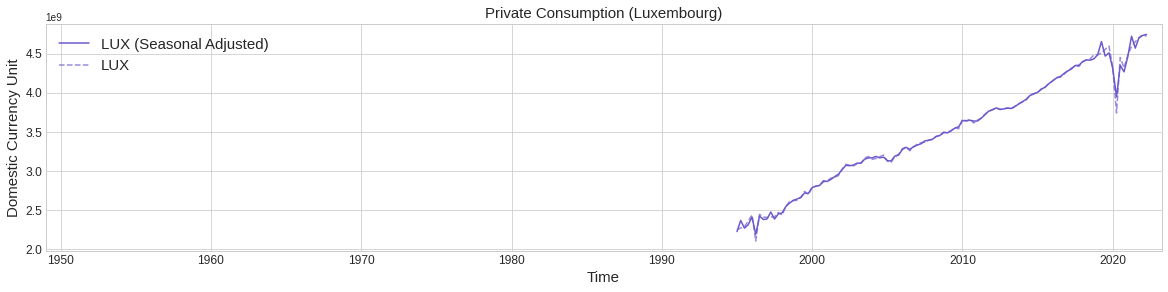

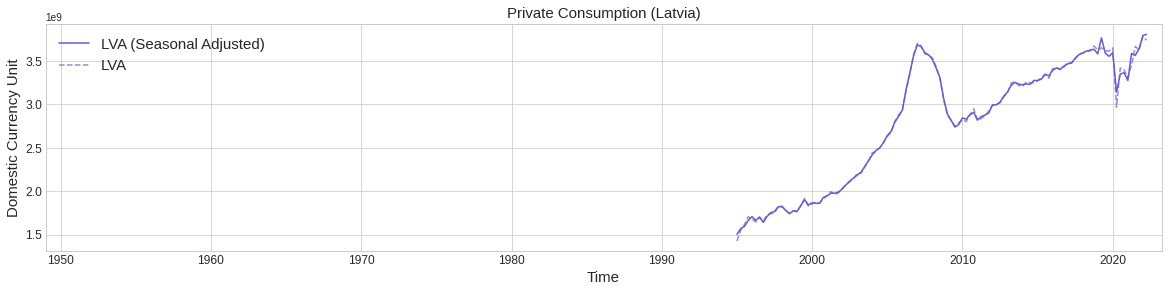

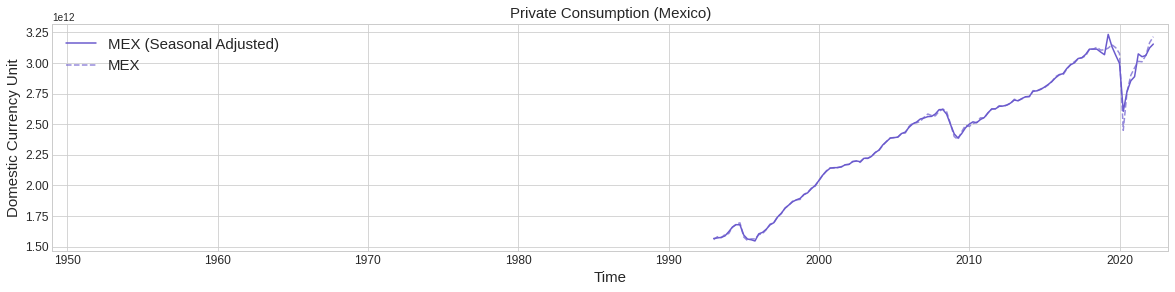

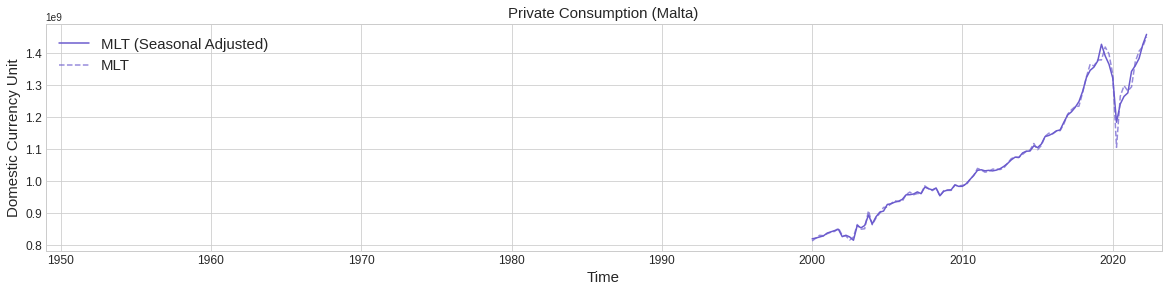

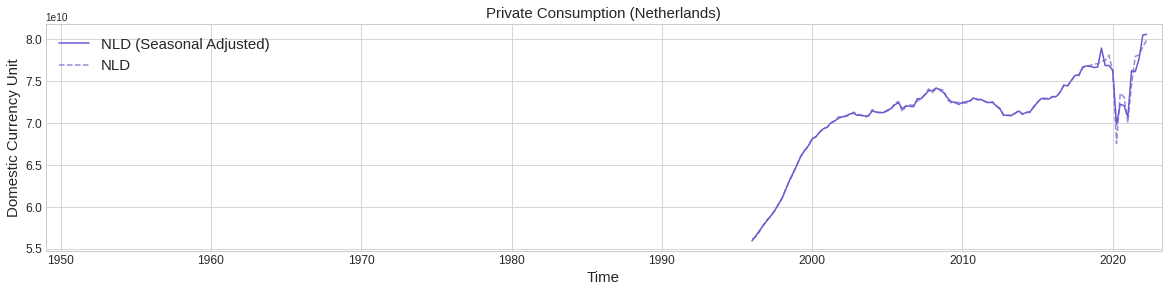

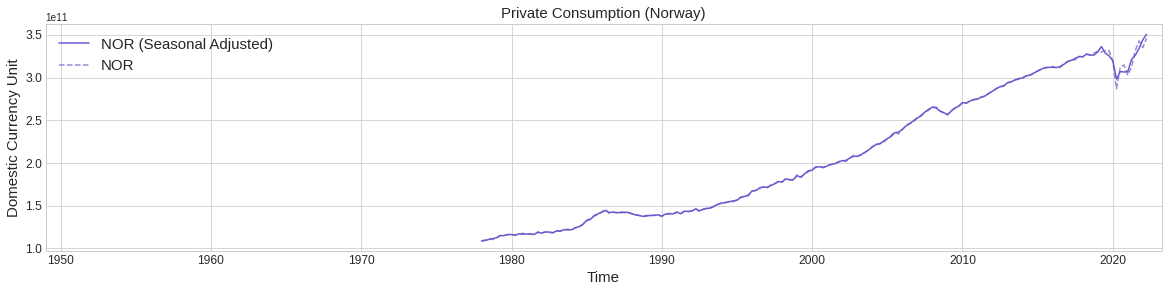

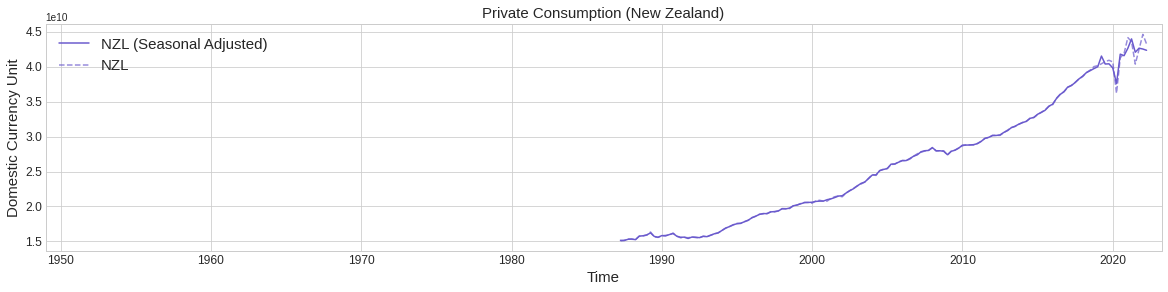

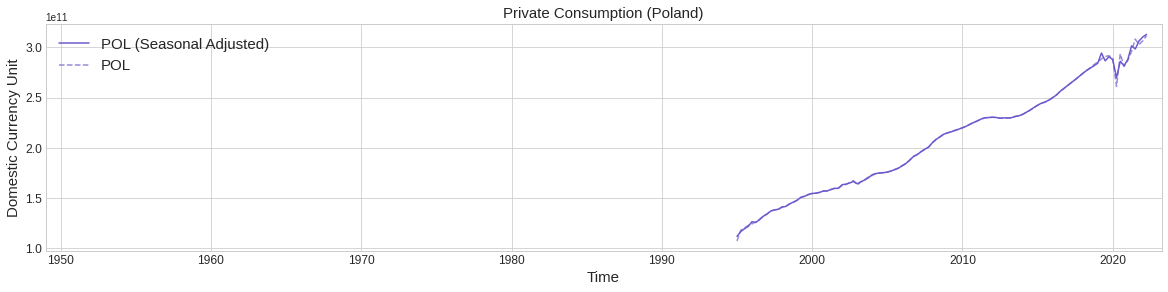

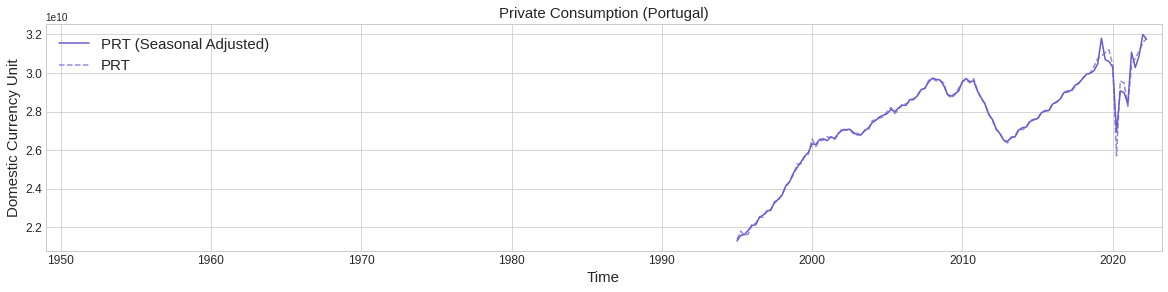

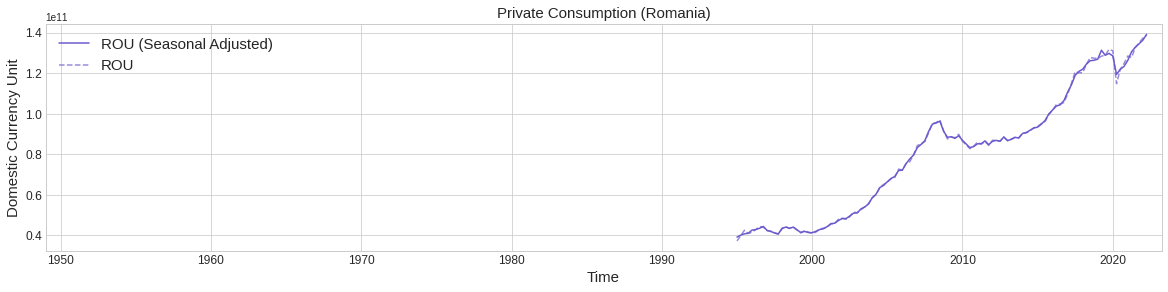

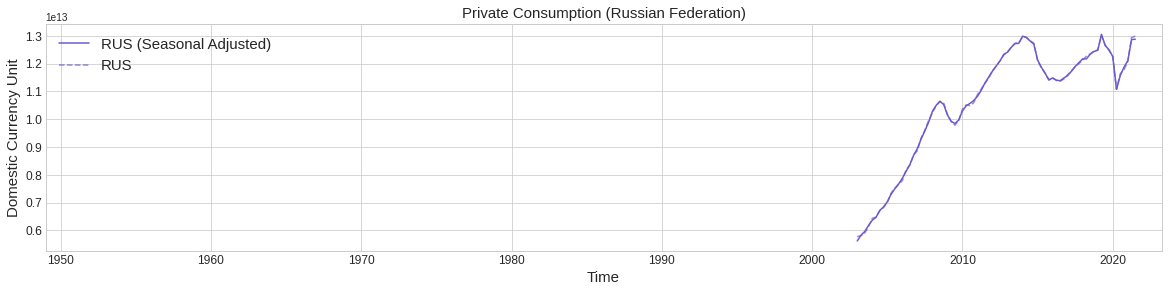

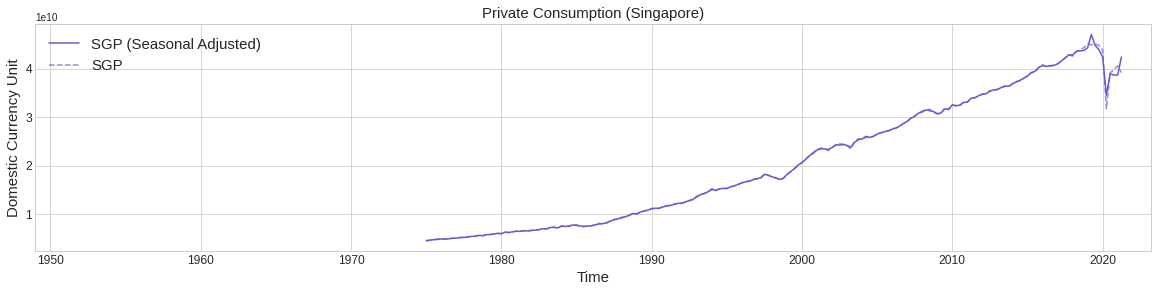

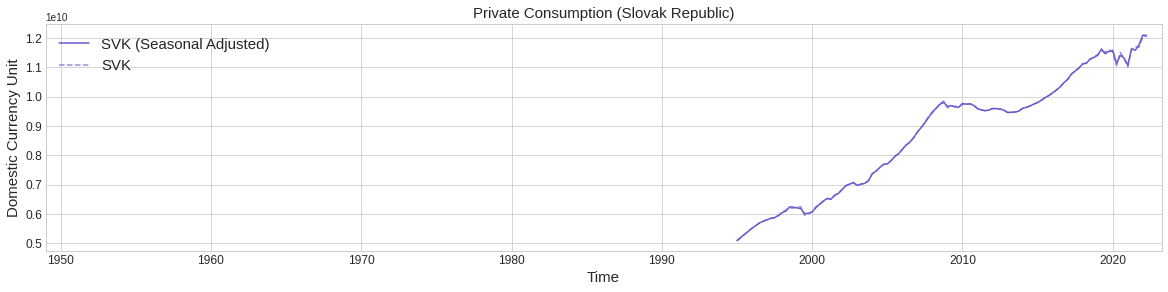

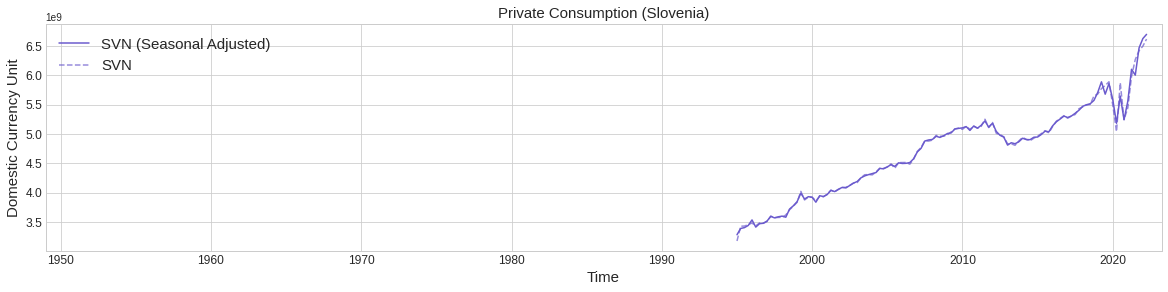

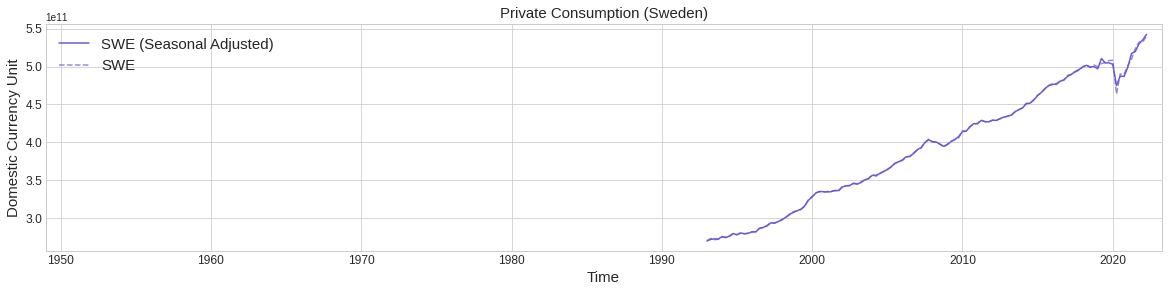

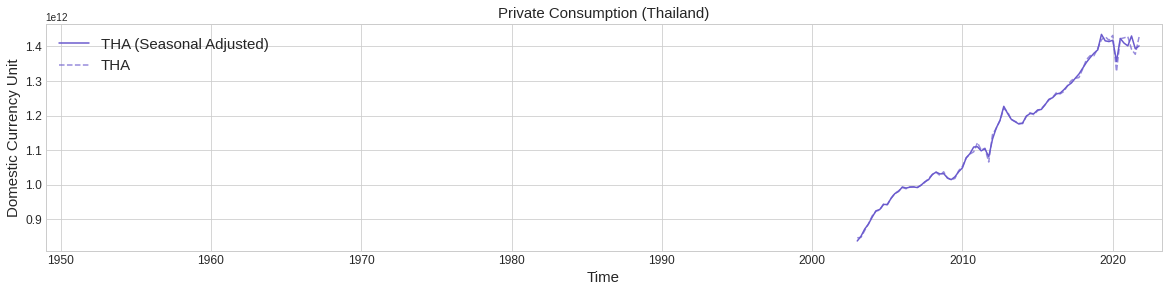

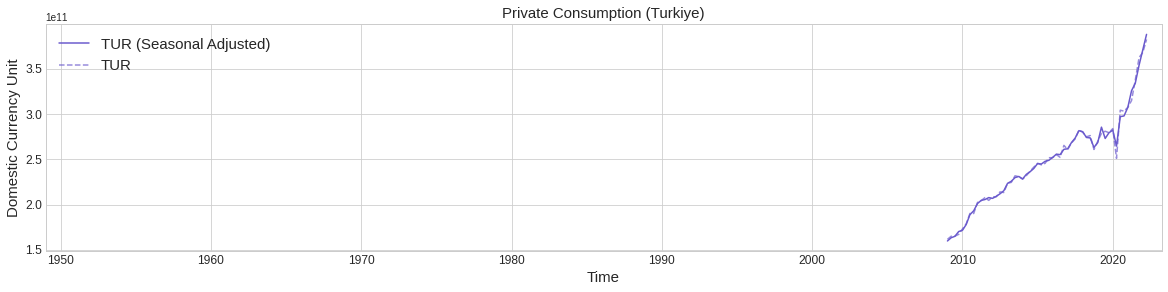

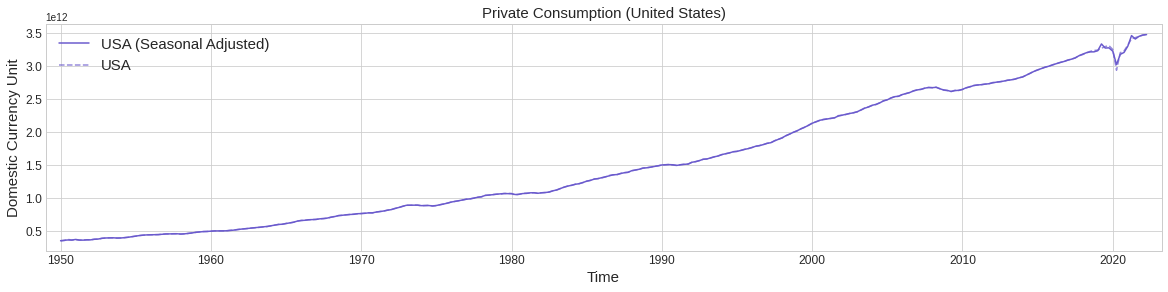

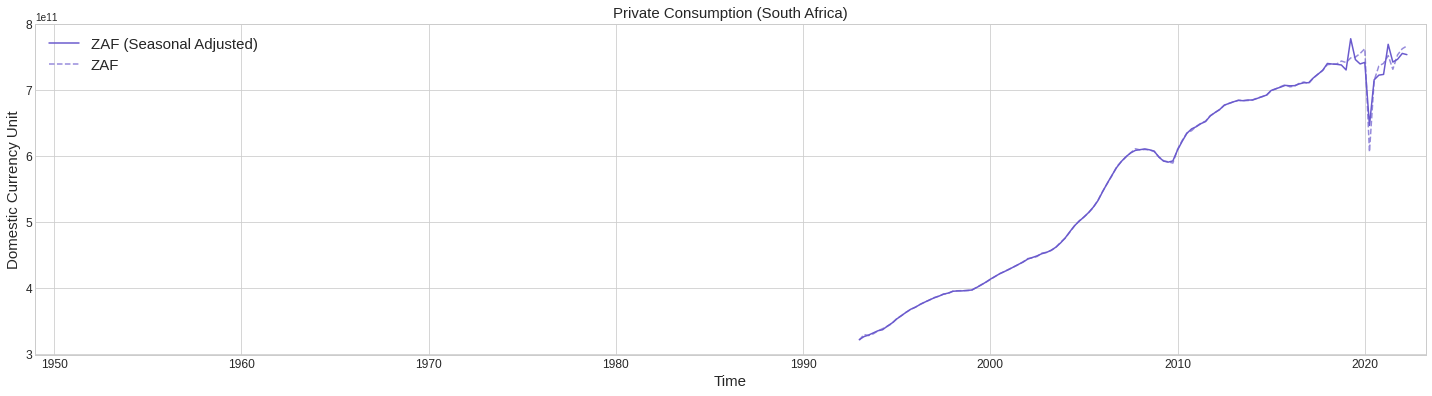

In [100]:
# pcon

warnings.filterwarnings(action='ignore')

for i in range(0, data['isocode'].unique().shape[0]):

    plt.figure(figsize=(20, 250)).set_facecolor('white')
    plt.style.use('seaborn-whitegrid')

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Private Consumption ({})'.format(data['country'].unique()[i]), fontsize=15)
  
    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['pcon'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0] + ' (Seasonal Adjusted)', color='slateblue')

    globals()['cond_temp_isocode{}'.format(i+1)] = (data_temp['isocode'] == data_temp['isocode'].unique()[i])
    globals()['data_temp_isocode{}'.format(i+1)] = data_temp.loc[globals()['cond_temp_isocode{}'.format(i+1)]]
    globals()['data_temp_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_temp_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_temp_isocode{}'.format(i+1)]['quarter'], globals()['data_temp_isocode{}'.format(i+1)]['pcon'], label=globals()['data_temp_isocode{}'.format(i+1)]['isocode'].unique()[0], color='slateblue', linestyle='dashed', alpha=0.7)

    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Domestic Currency Unit', fontsize=15)
    plt.xlim([dt.date(1949, 1, 1), dt.date(2023, 4, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

### **3.2. cds** <br/>

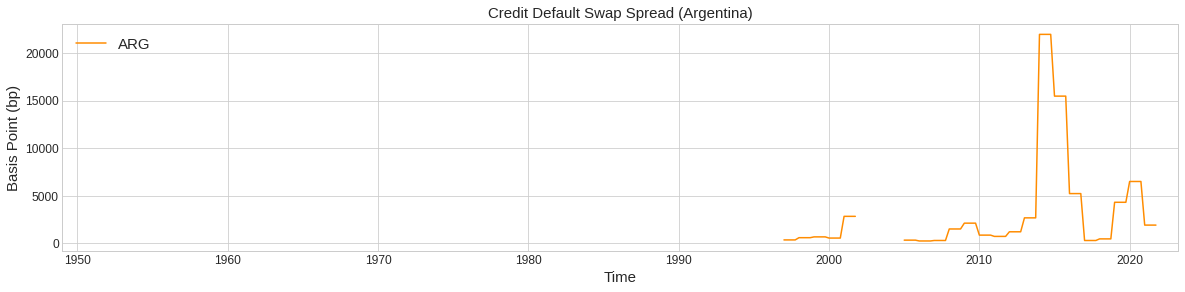

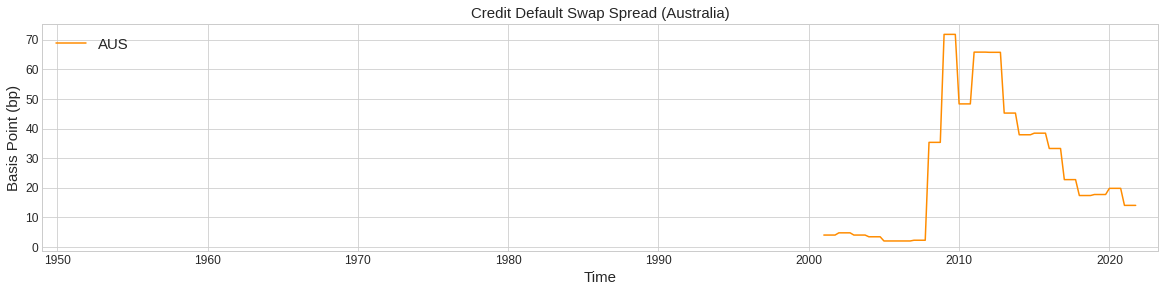

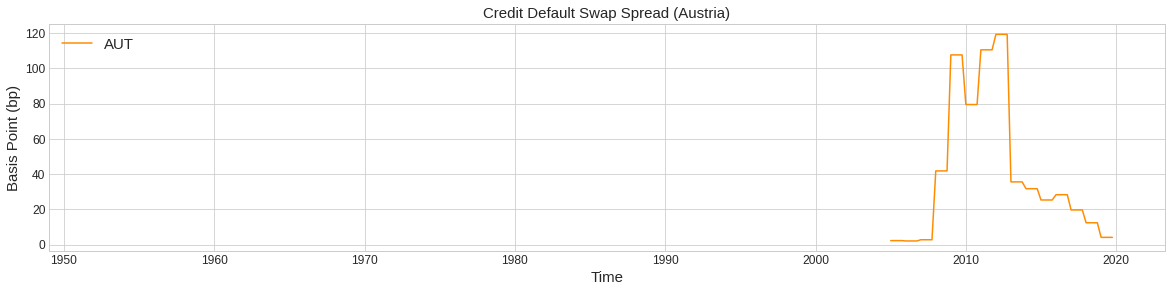

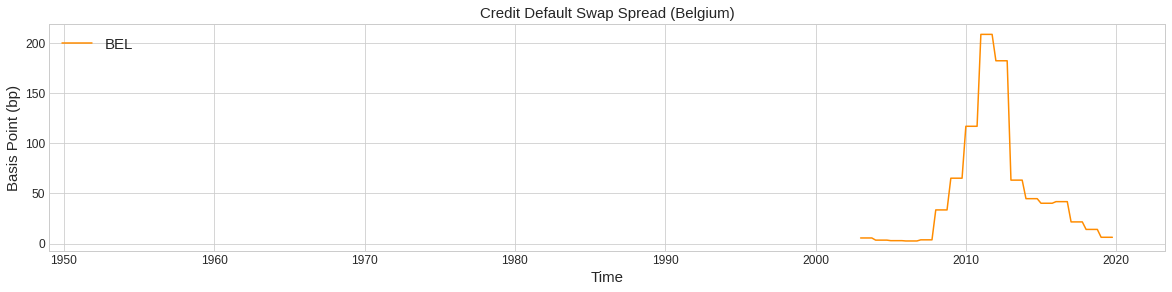

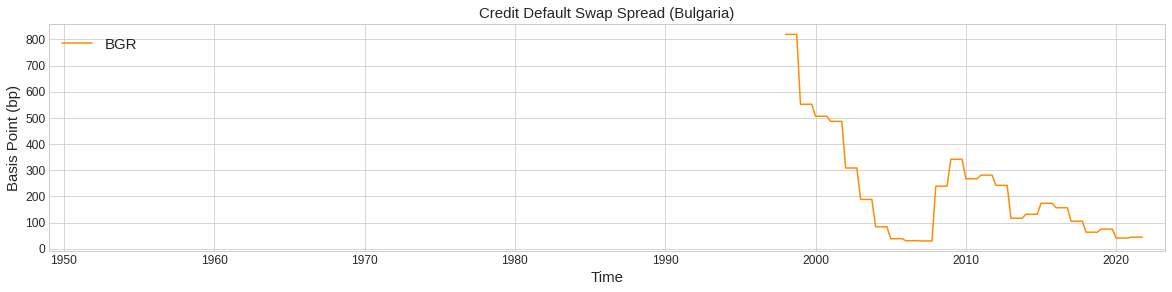

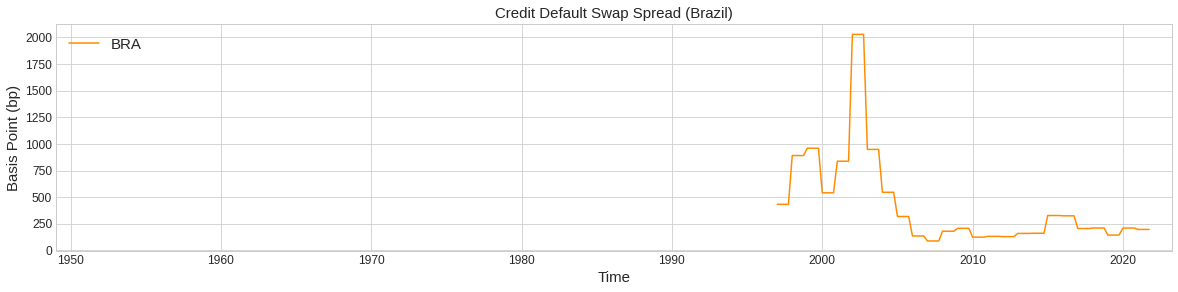

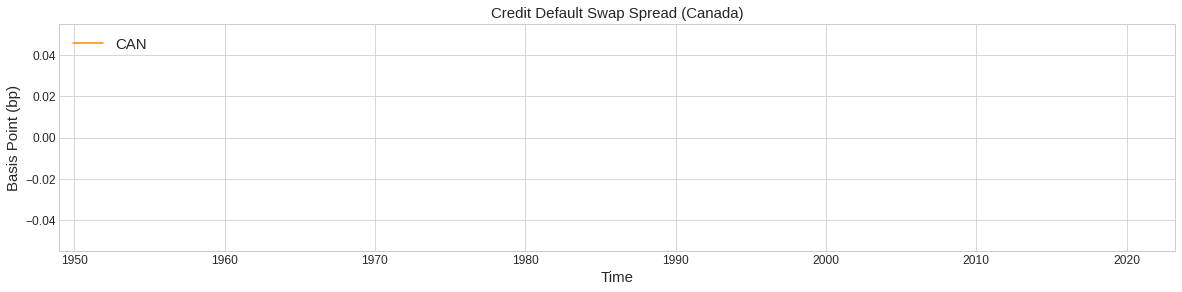

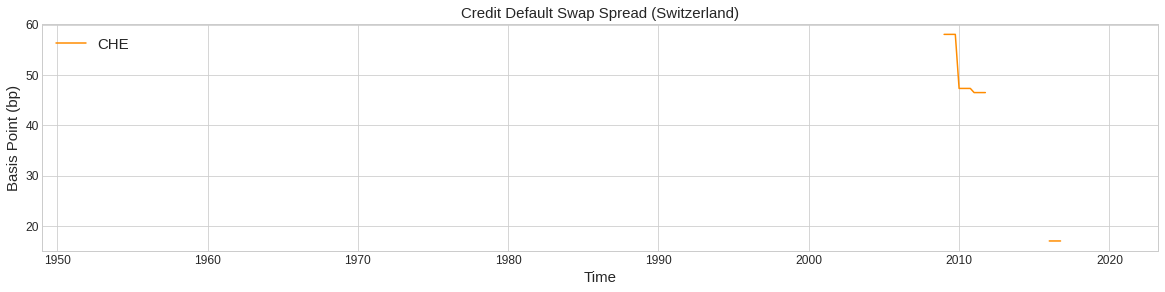

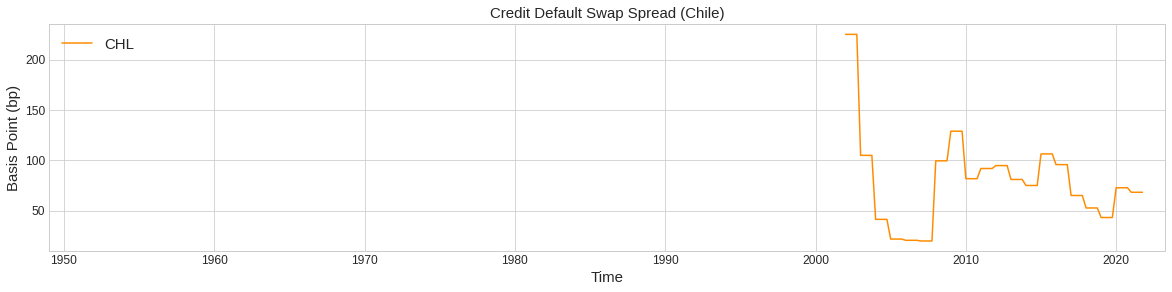

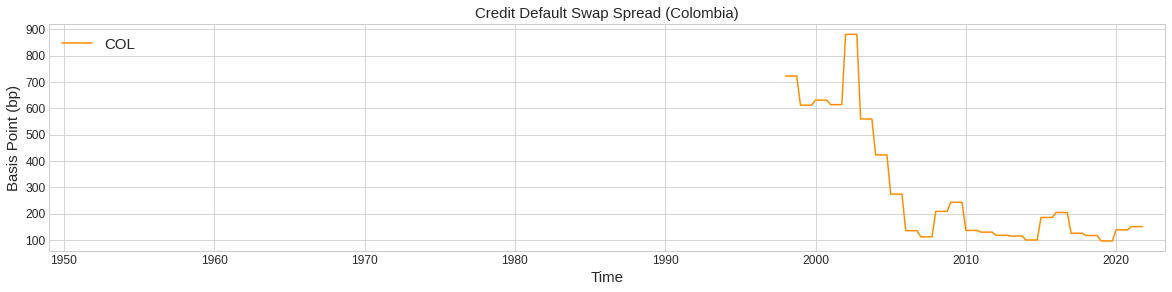

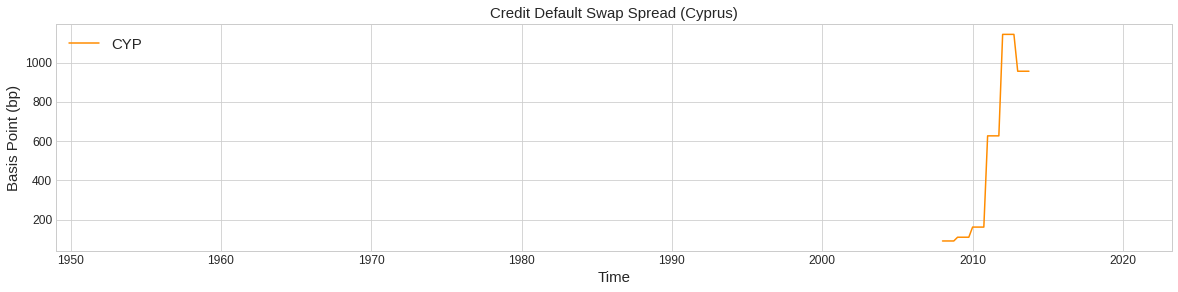

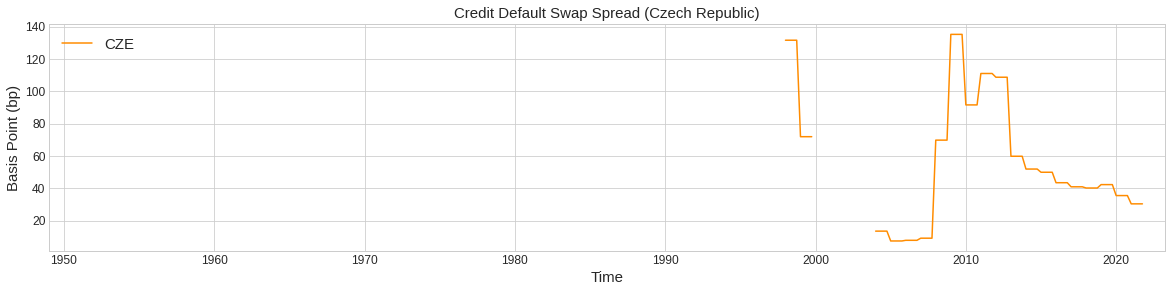

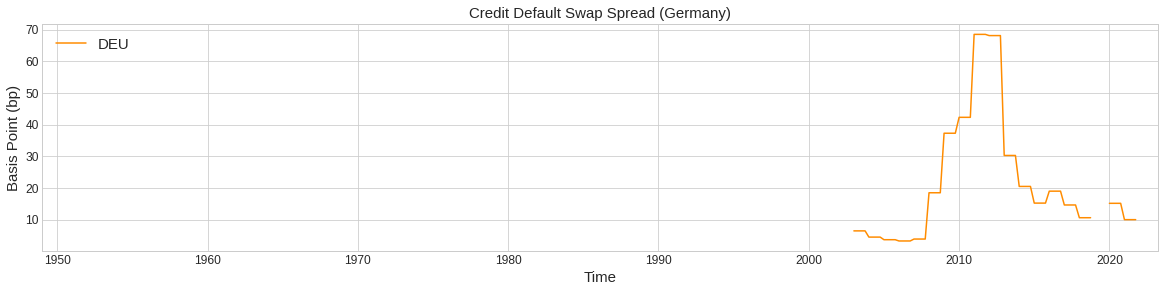

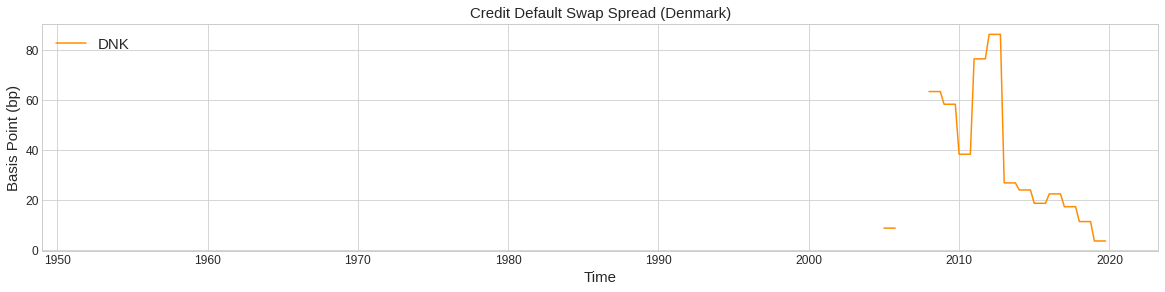

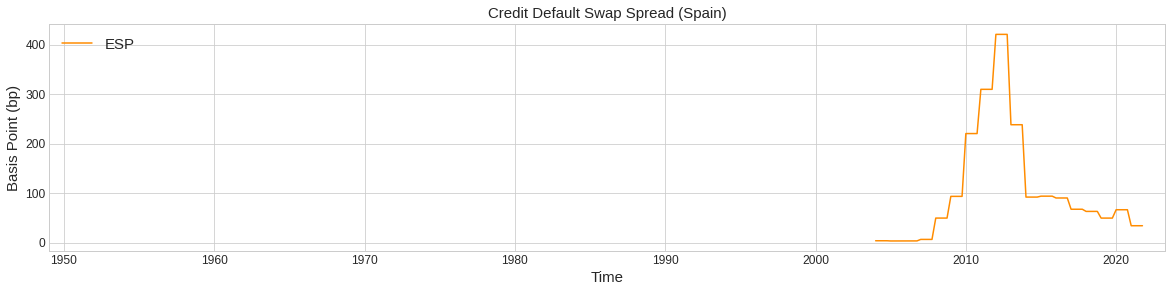

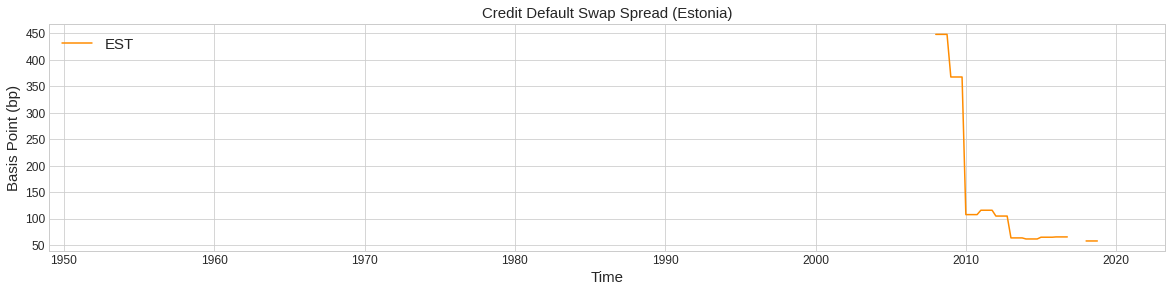

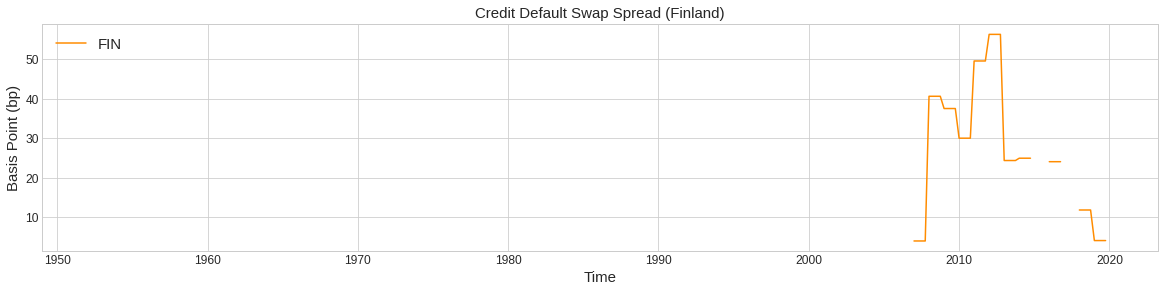

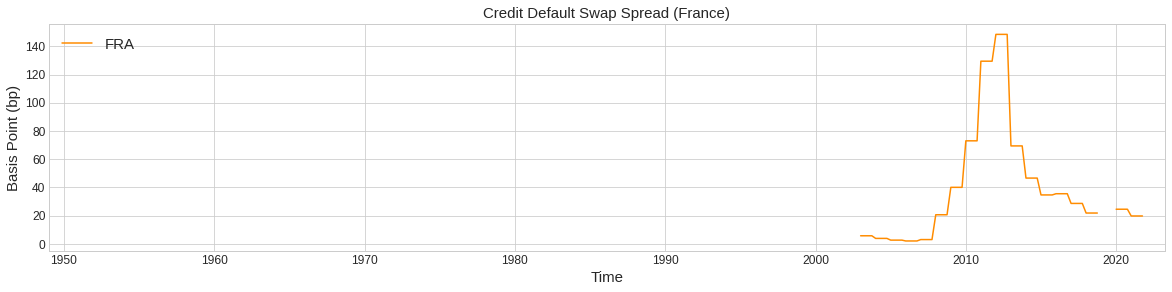

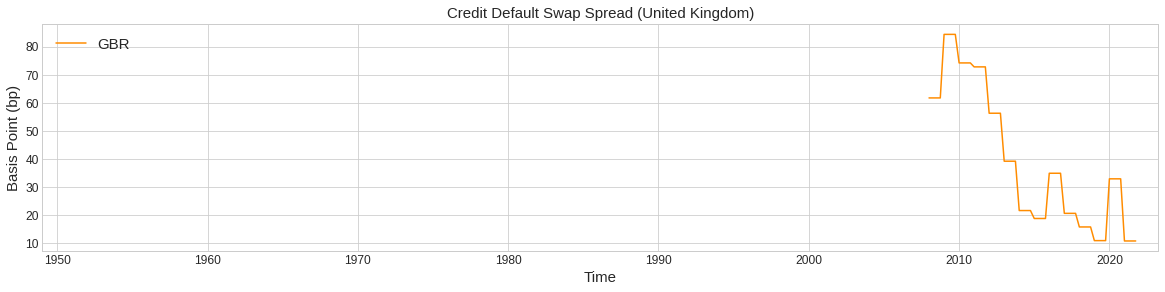

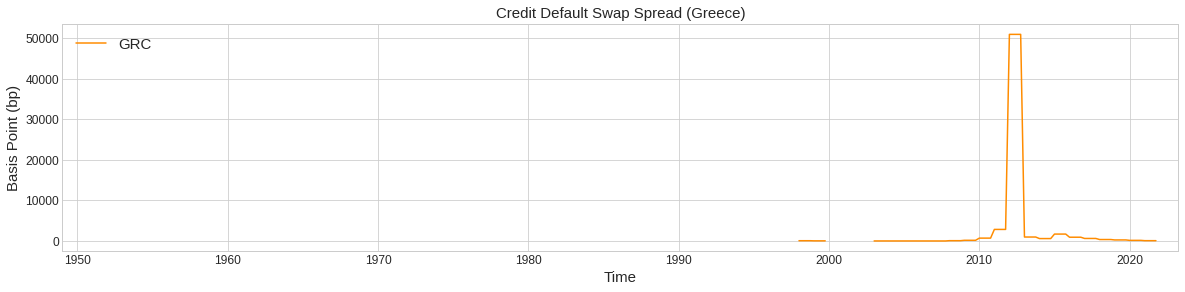

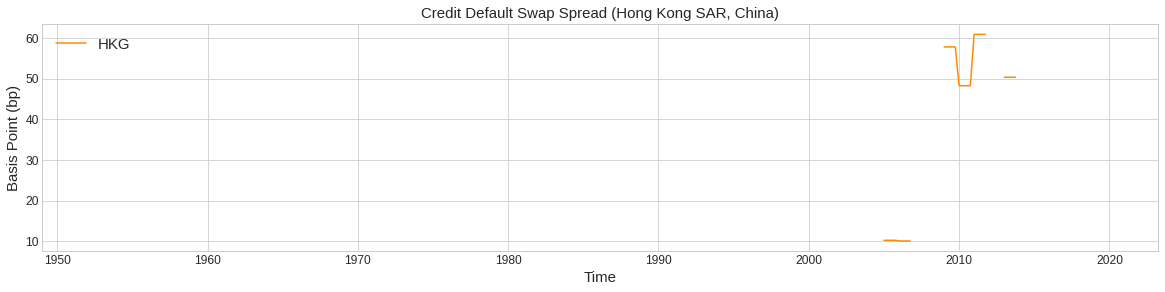

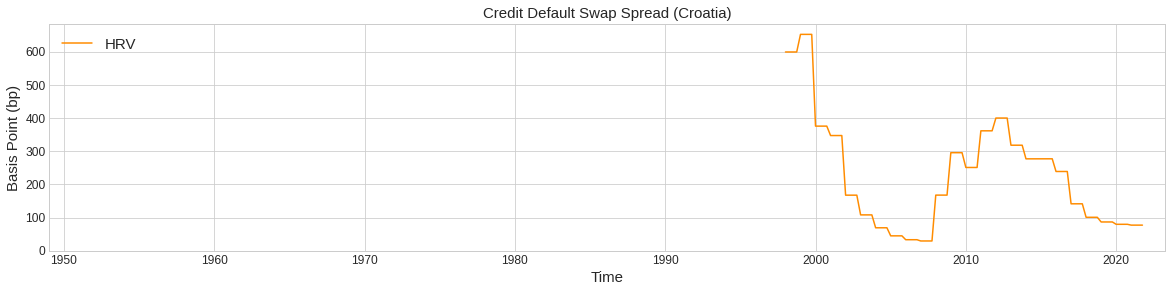

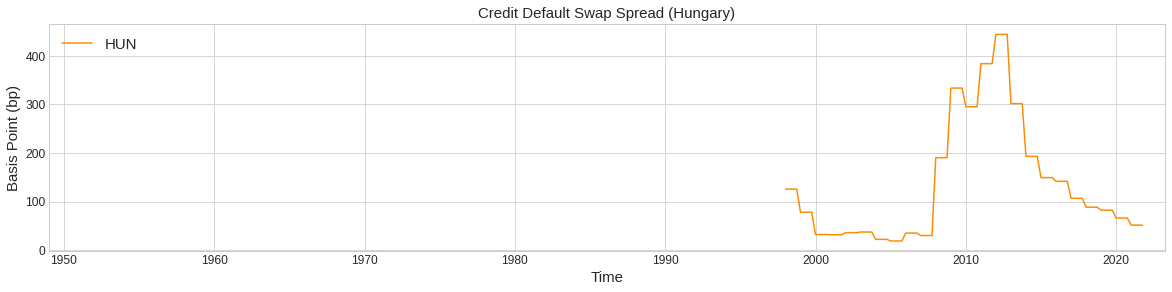

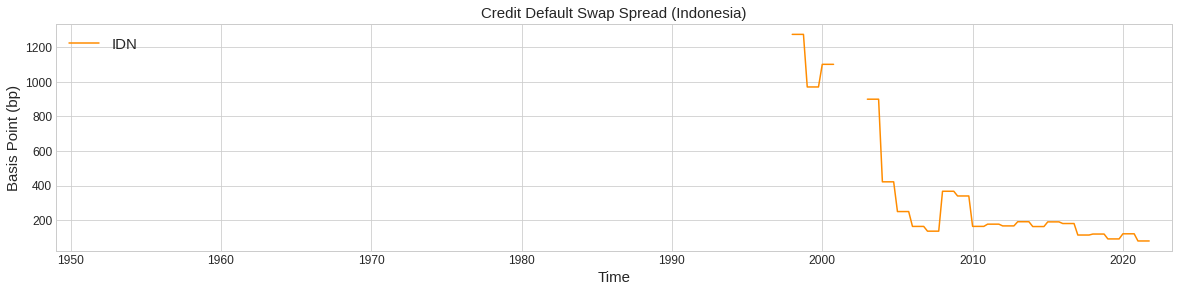

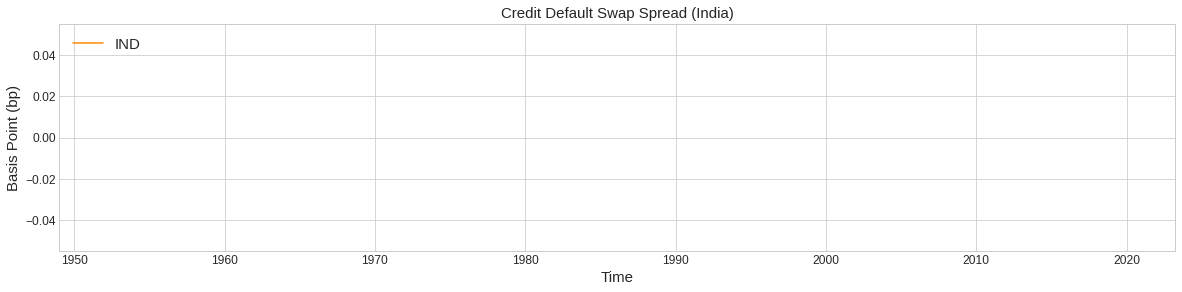

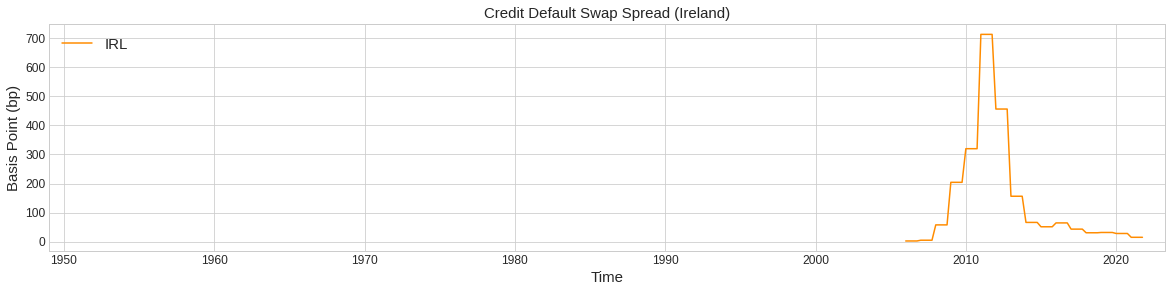

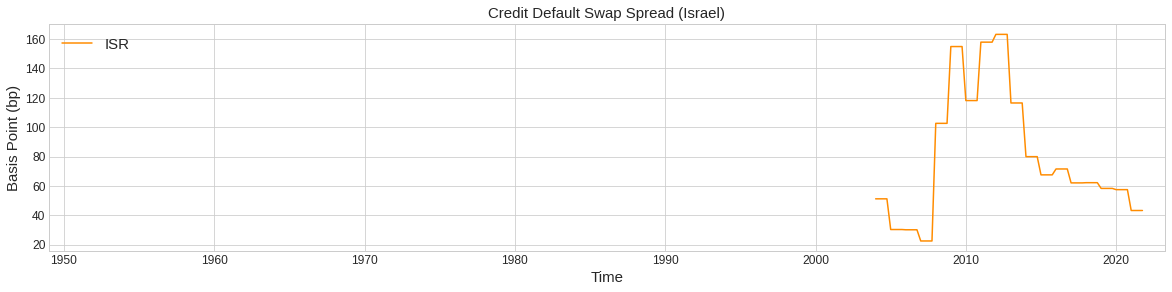

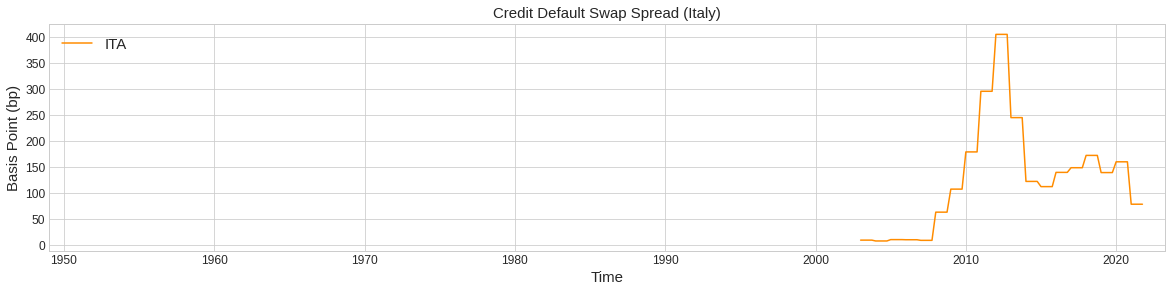

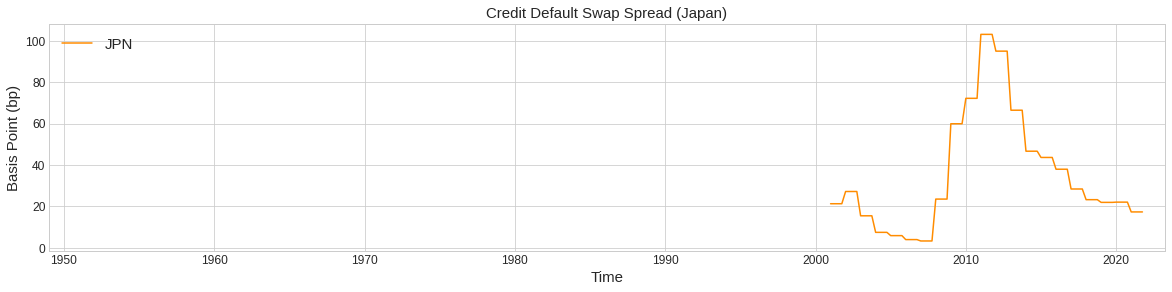

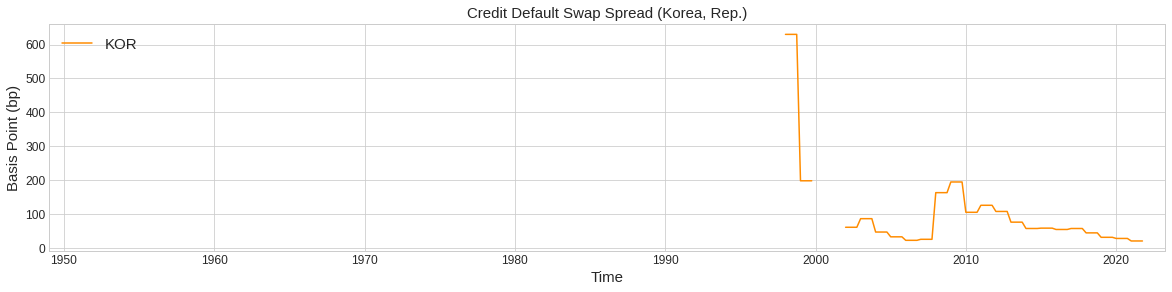

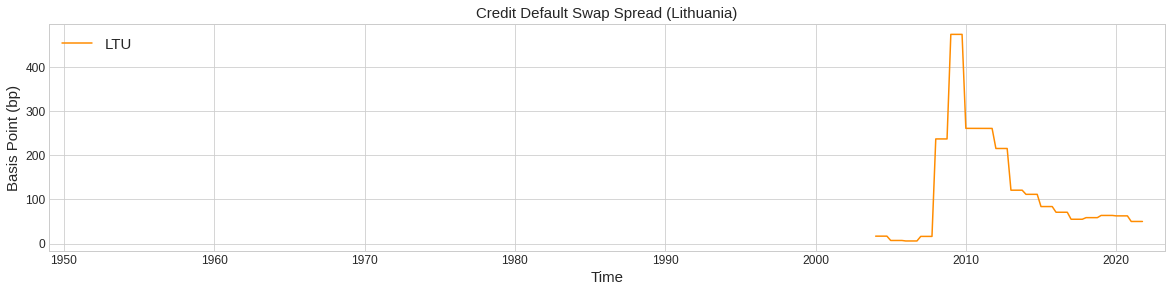

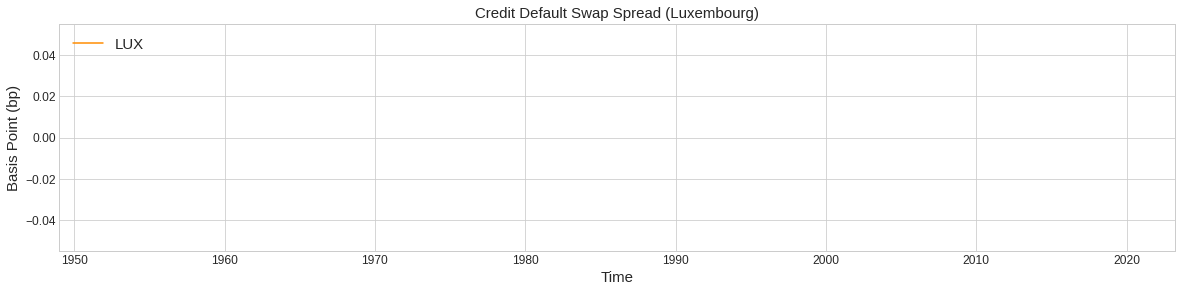

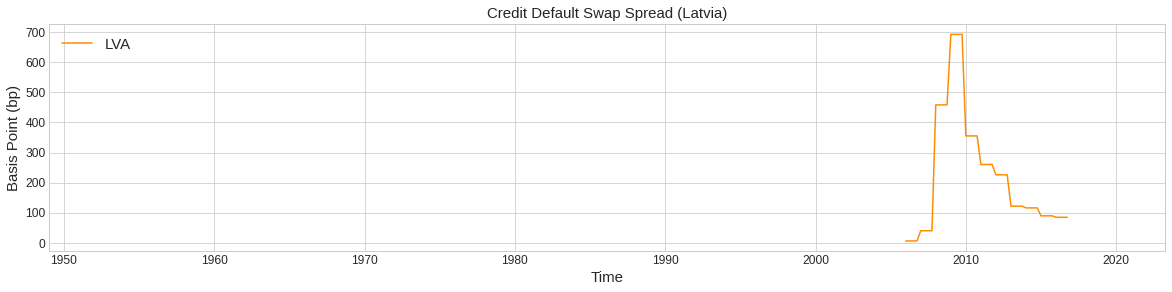

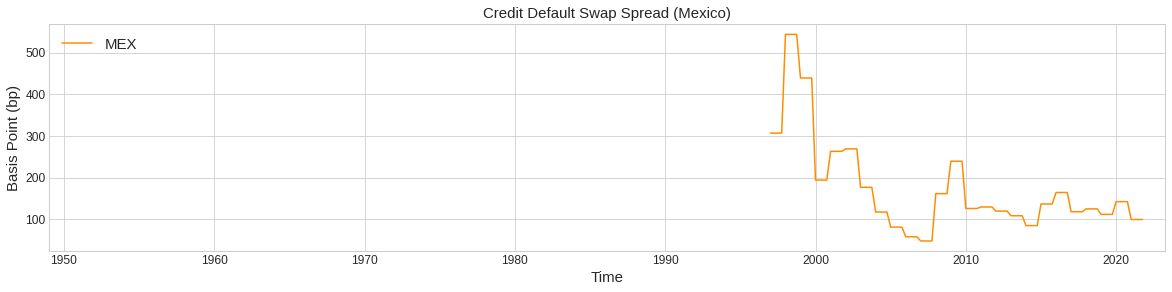

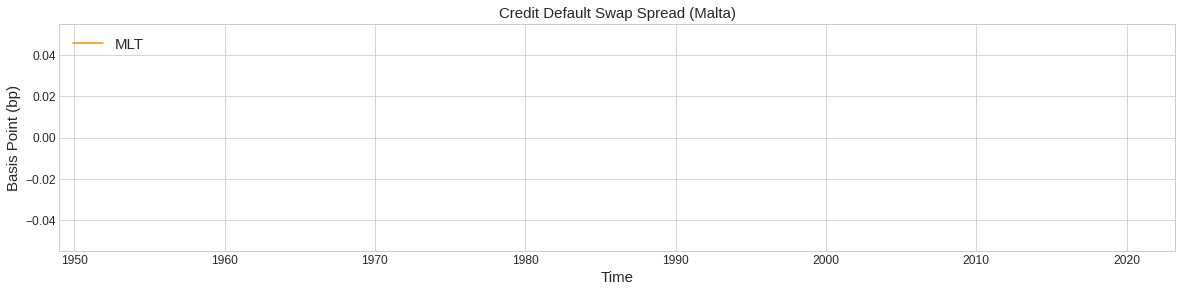

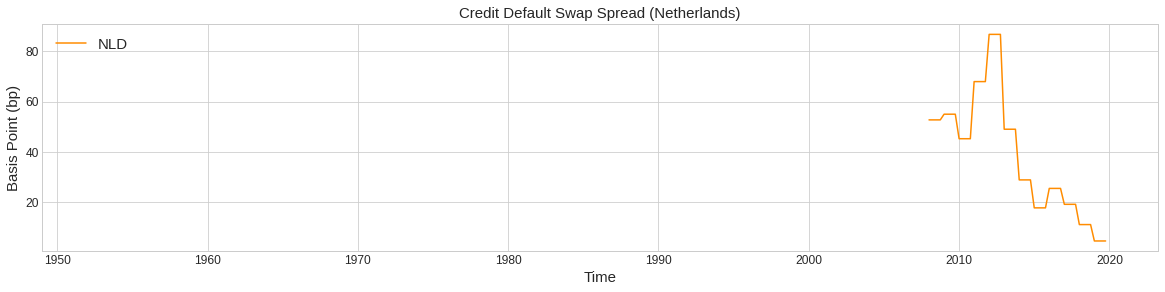

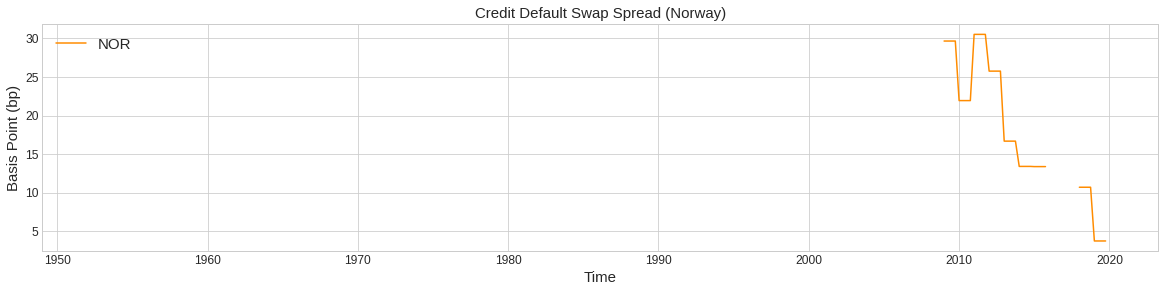

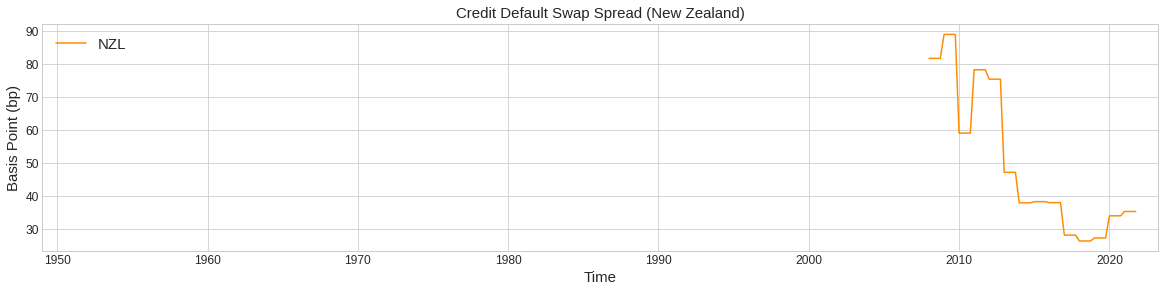

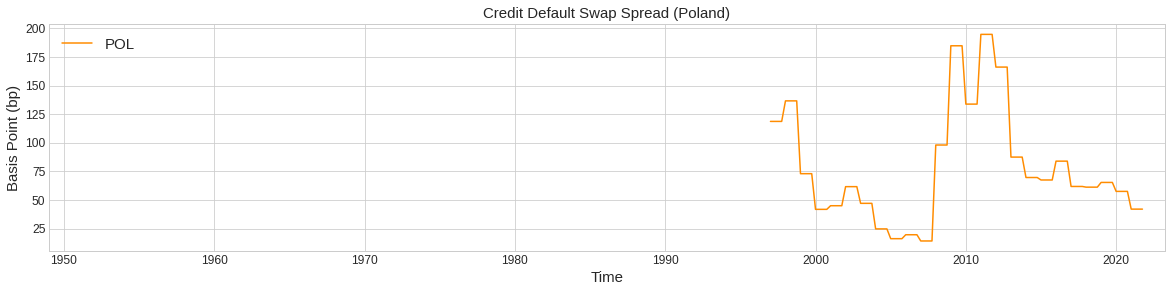

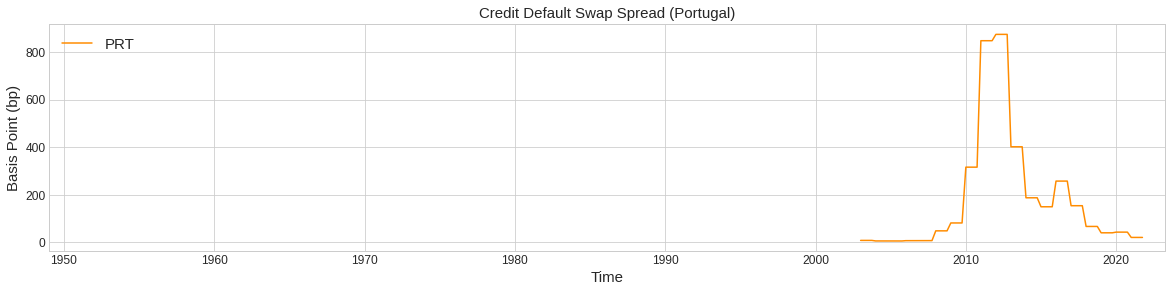

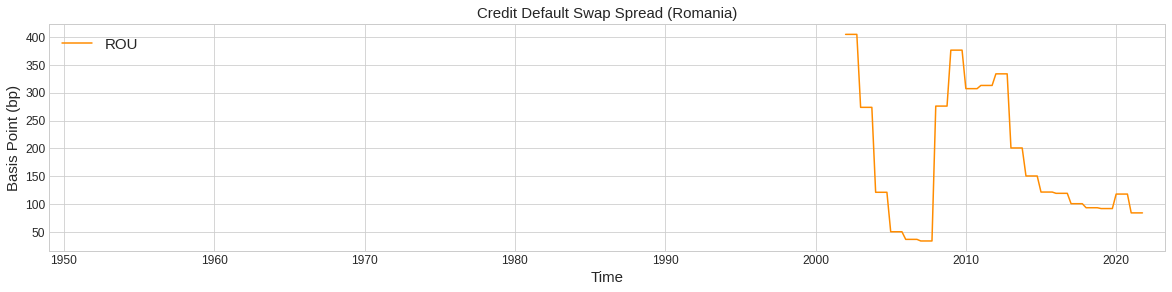

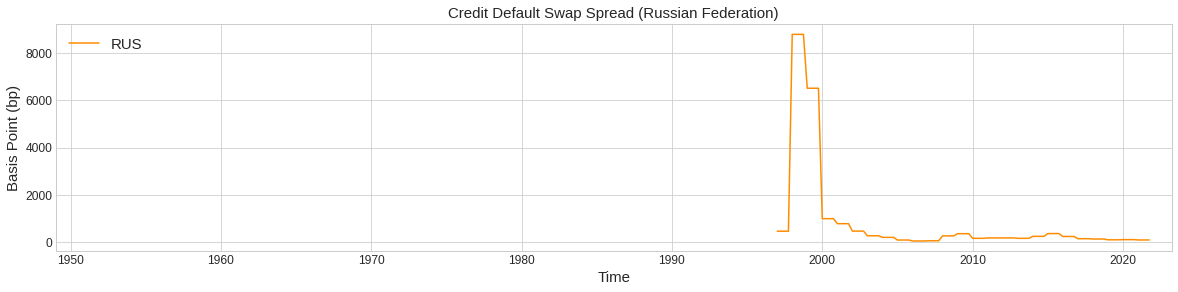

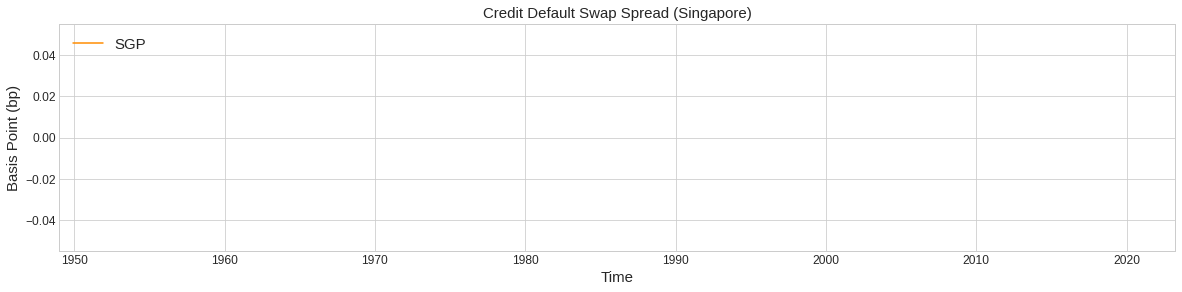

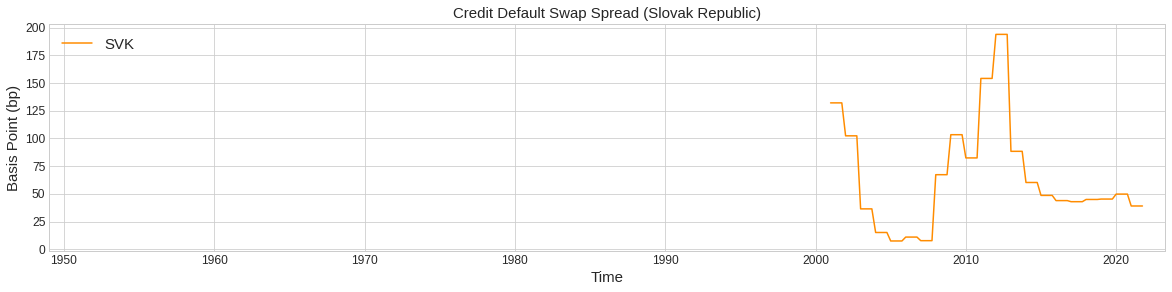

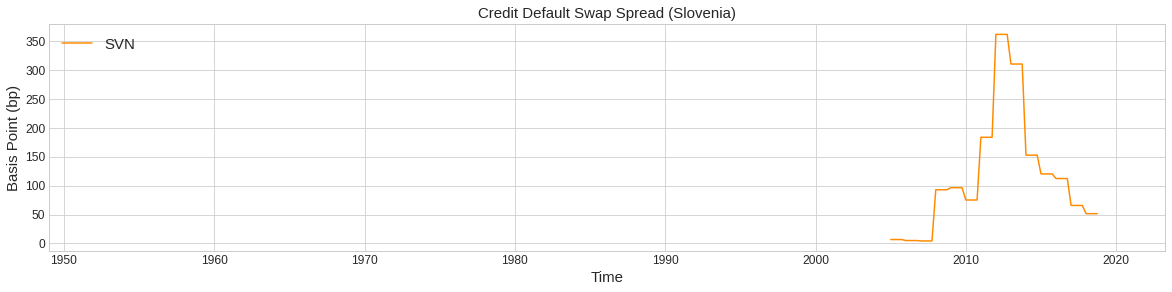

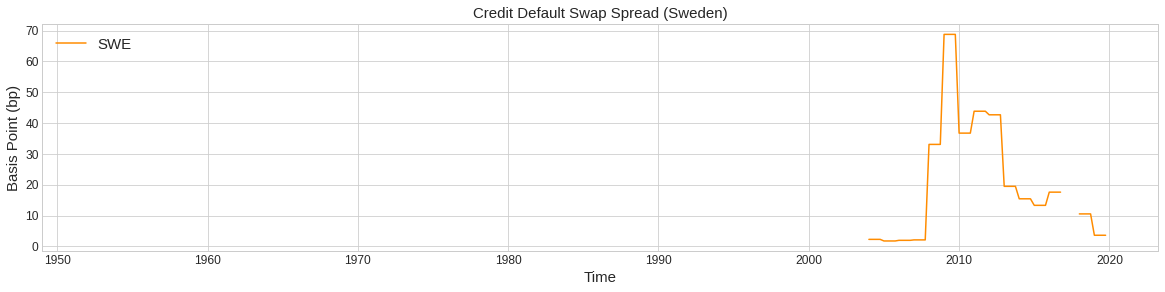

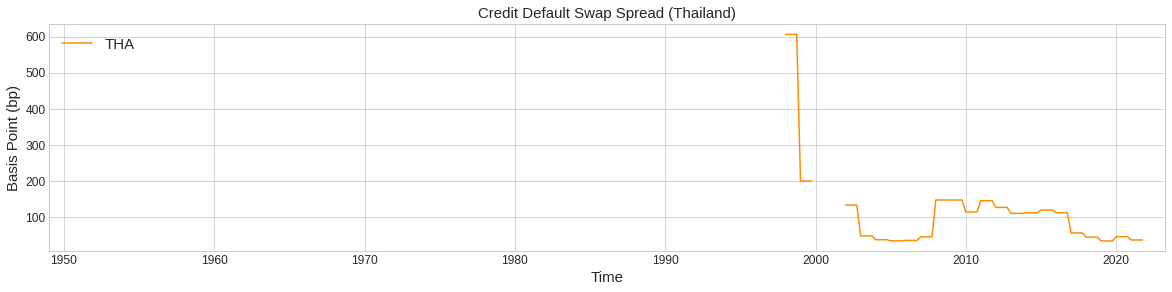

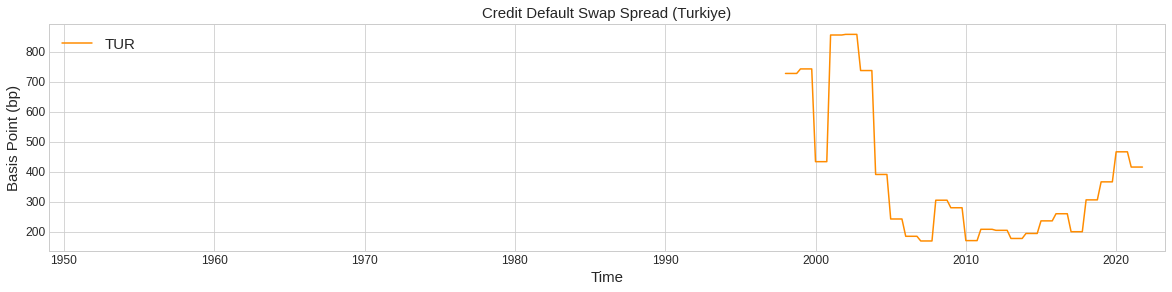

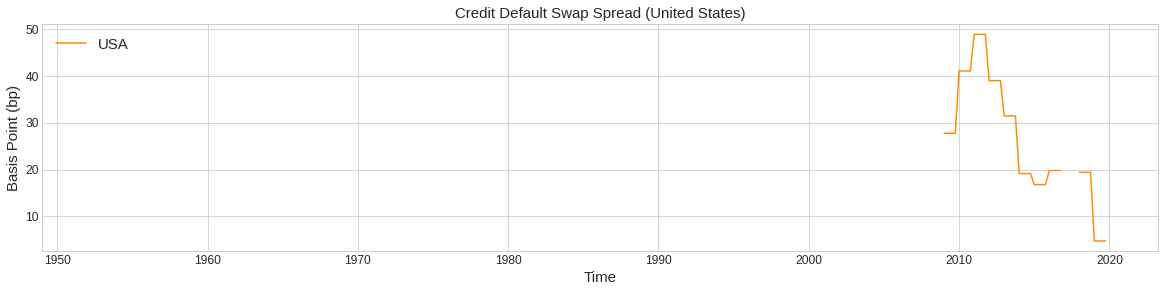

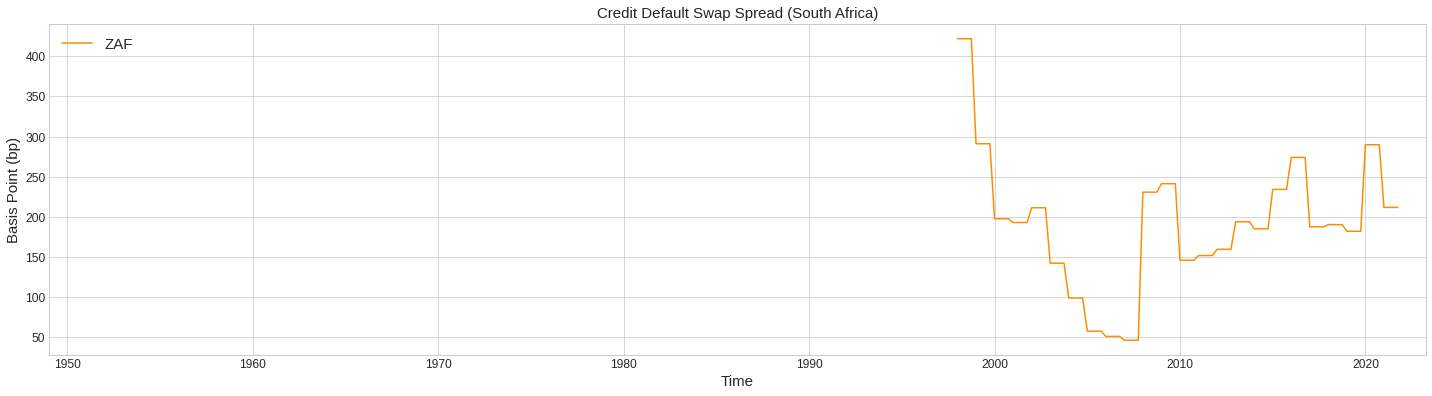

In [101]:
# cds

warnings.filterwarnings(action='ignore')

for i in range(0, data['isocode'].unique().shape[0]):

    plt.figure(figsize=(20, 250)).set_facecolor('white')
    plt.style.use('seaborn-whitegrid')

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Credit Default Swap Spread ({})'.format(data['country'].unique()[i]), fontsize=15)
  
    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['cds'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0], color='darkorange')
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Basis Point (bp)', fontsize=15)
    plt.xlim([dt.date(1949, 1, 1), dt.date(2023, 4, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

## **4. export the data**

In [102]:
# quarterly dataset

data['quarter'] = pd.to_datetime(data['quarter'])
data['quarter'] = data['quarter'].dt.to_period('Q')

data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

data

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,finopen_fa,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.22,NaN,NaN,245.38,NaN,NaN,70.88,223698443352.74,1165743462187.47,80.20,5.04,769625497221.63,211.64
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.41,NaN,NaN,226.94,NaN,NaN,70.73,223959202009.14,1124134900926.21,78.67,2.39,742694325320.05,211.64
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.45,NaN,NaN,204.00,NaN,NaN,71.31,224091595830.67,1125566644987.62,75.72,3.02,746925974429.68,211.64
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.19,NaN,NaN,NaN,NaN,NaN,NaN,225833007897.79,1137366344106.18,76.99,2.61,755775447564.89,NaN


In [104]:
# export the quarterly data

data.to_excel(excel_writer='data_221011.xlsx')

## **5. references**

* https://data.imf.org/?sk=4c514d48-b6ba-49ed-8ab9-52b0c1a0179b&sId=1409151240976 <br/>
* https://www.worldbank.org/en/research/brief/fiscal-space <br/>
* https://documents1.worldbank.org/curated/en/601211501678994591/pdf/WPS8157.pdf <br/>
* https://www.brookings.edu/research/the-external-wealth-of-nations-database/
<br/>
* https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906 <br/>
* https://carmenreinhart.com/exchange-rate/# <br/>